In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time
from ipywidgets import interact

A notebook version of:

https://bastibe.de/2013-05-30-speeding-up-matplotlib.html

but using `interact`

# Interact attempt

In [6]:
def update(n=100):
    plt.plot(np.random.random(100))

interact(update,n=(100,200))

interactive(children=(IntSlider(value=100, description='n', max=200, min=100), Output()), _dom_classes=('widge…

<function __main__.update(n=100)>

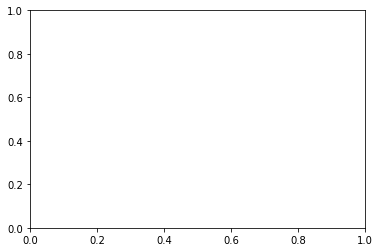

interactive(children=(IntSlider(value=100, description='n', max=200, min=100), Output()), _dom_classes=('widge…

<function __main__.update(n=100)>

In [8]:
fig,ax = plt.subplots()

def update(n=100):
    ax.plot(np.random.random(100))

interact(update,n=(100,200))

OK, I don't understand why this does not produce an interactive plot. 

# Try directly the code from the website 

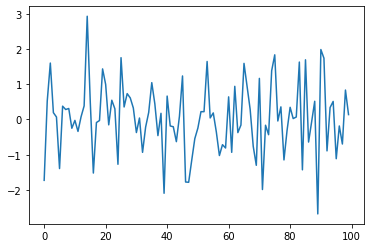

49


In [17]:
fig, ax = plt.subplots()

tstart = time.time()
num_plots = 0
while time.time()-tstart < 1:
    ax.clear()
    ax.plot(np.random.randn(100))
    plt.pause(0.001)
    num_plots += 1
print(num_plots)

49 frames per second, but not really fair since it only displays the plot when it is done. 

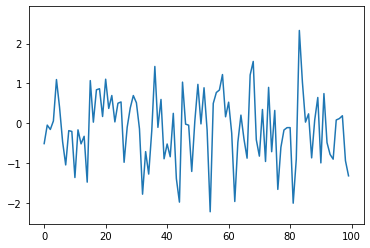

656


In [19]:
fig, ax = plt.subplots()
line, = ax.plot(np.random.randn(100))

tstart = time.time()
num_plots = 0
while time.time()-tstart < 1:
    line.set_ydata(np.random.randn(100))
    plt.pause(0.001)
    num_plots += 1
print(num_plots)

This is indeed a big improvement

74


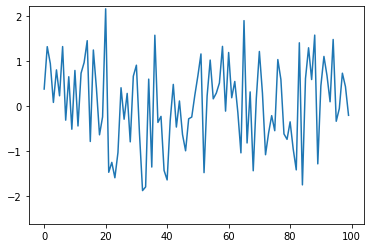

In [20]:
fig, ax = plt.subplots()
line, = ax.plot(np.random.randn(100))

tstart = time.time()
num_plots = 0
while time.time()-tstart < 1:
    line.set_ydata(np.random.randn(100))
    fig.canvas.draw()
    fig.canvas.flush_events()
    num_plots += 1
print(num_plots)

Interestingly, in a notebook this is slower, while on the website it is faster? 

# Stackexchange suggestion: notebook driver? 

https://stackoverflow.com/questions/40122837/interactive-matplotlib-using-ipywidgets

In [39]:
%matplotlib inline

x = np.linspace(0, 2 * np.pi)

def update(w = 1.0):
    plt.plot(x, np.sin(w * x))

interact(update);

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

Slow

In [37]:
%matplotlib inline

x = np.linspace(0, 2 * np.pi)

def update(w = 1.0):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, np.sin(w * x))
    fig.canvas.draw()
    plt.show()

interact(update);

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

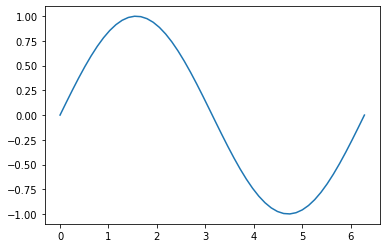

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [34]:
%matplotlib inline

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw()

interact(update);

<IPython.core.display.Javascript object>


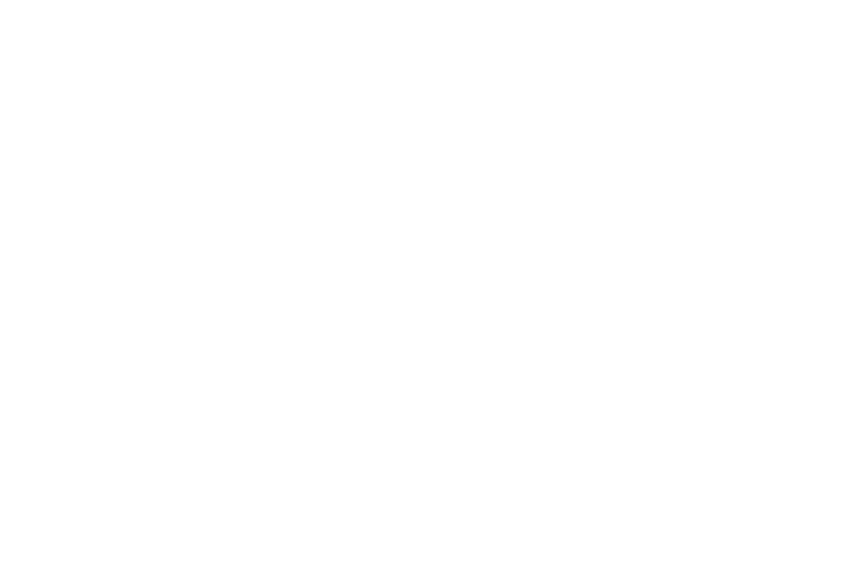

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

<IPython.core.display.Javascript object>


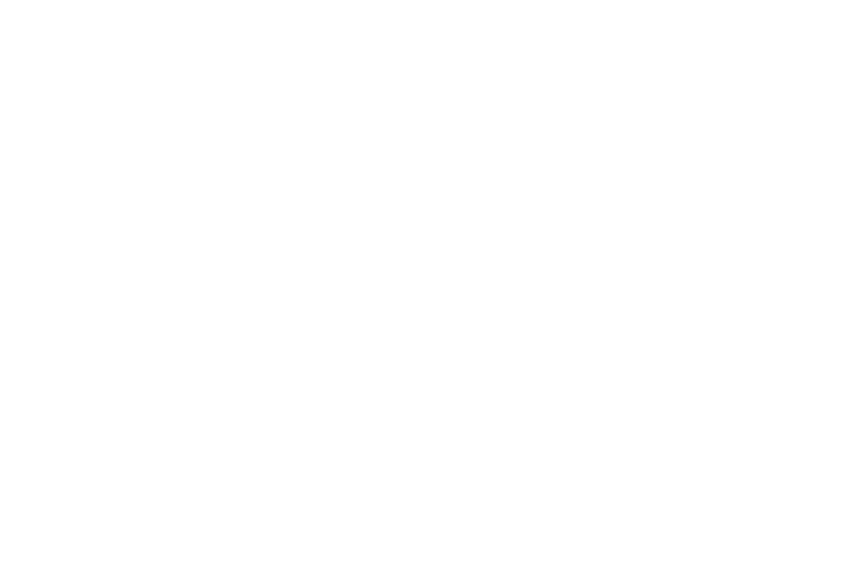

In [38]:
%matplotlib notebook

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw()
    plt.show()

interact(update);

This doesn't work at all!!!

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

<IPython.core.display.Javascript object>


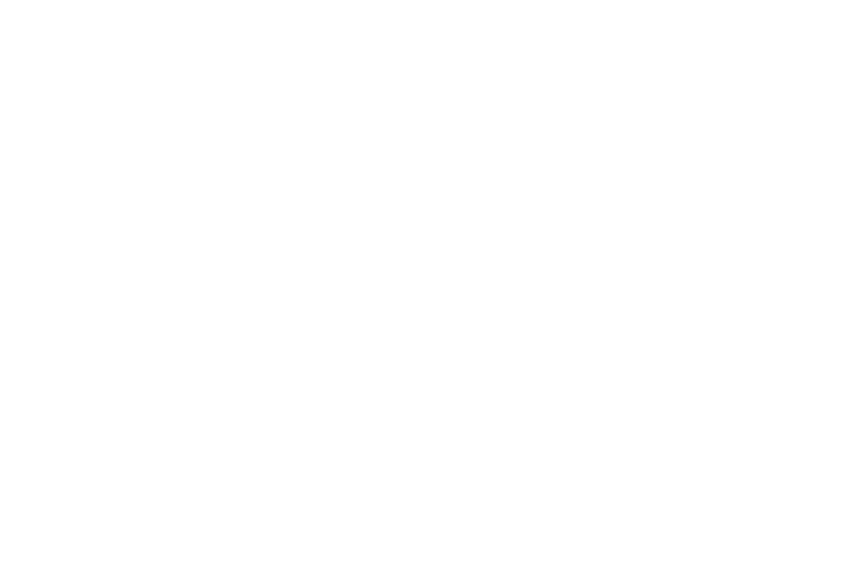

<IPython.core.display.Javascript object>


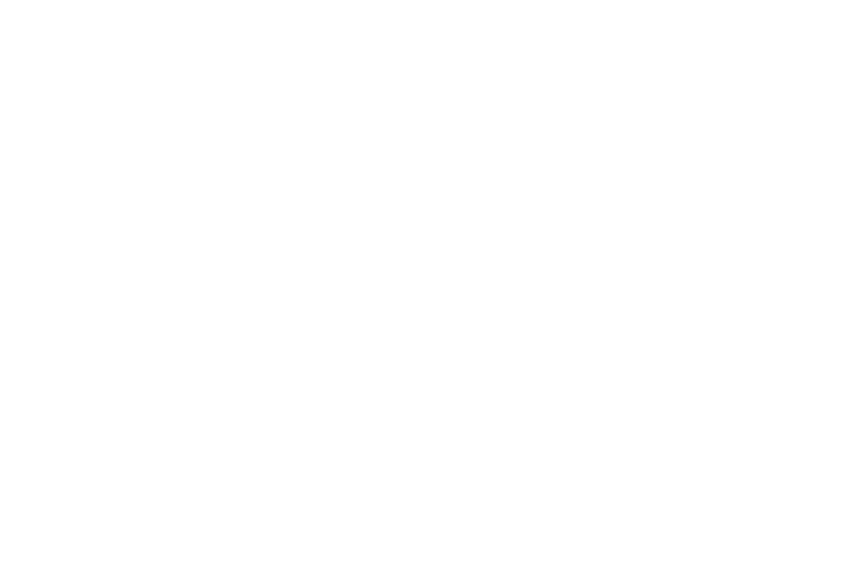

<IPython.core.display.Javascript object>


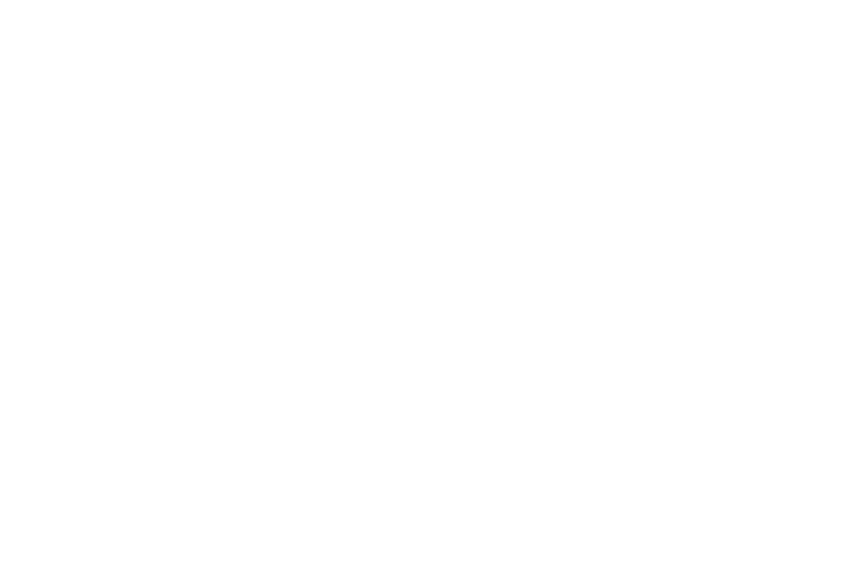

<IPython.core.display.Javascript object>


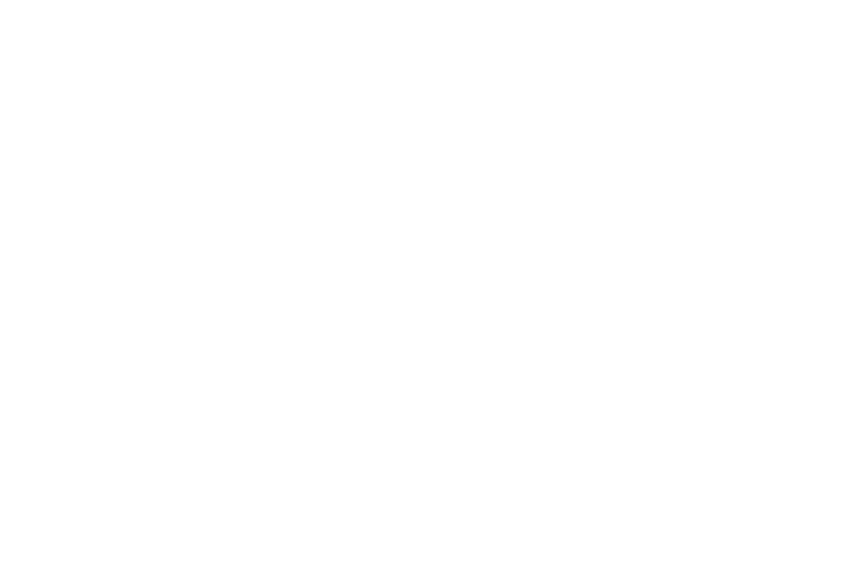

<IPython.core.display.Javascript object>


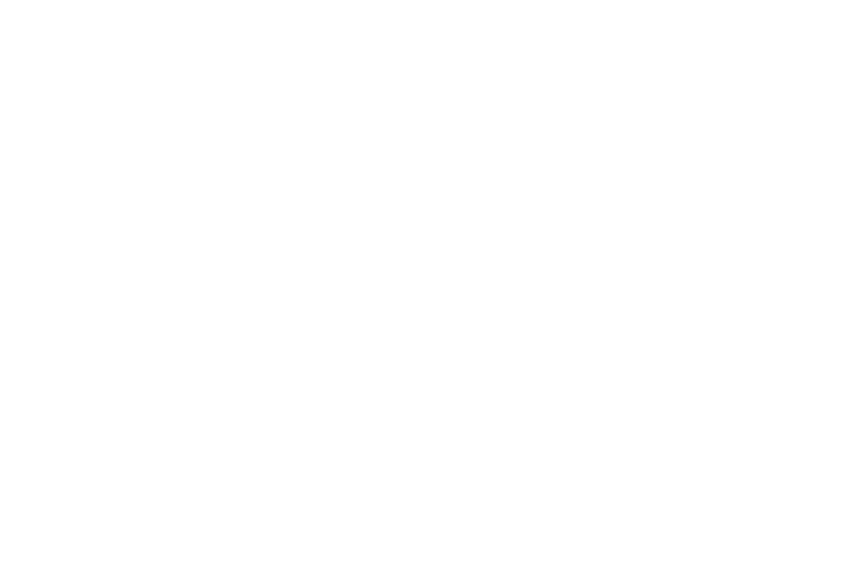

<IPython.core.display.Javascript object>


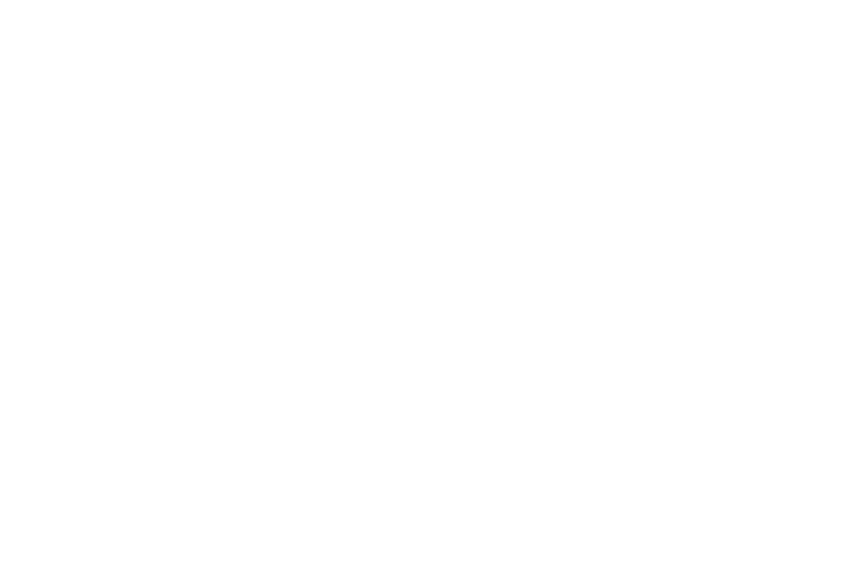

<IPython.core.display.Javascript object>


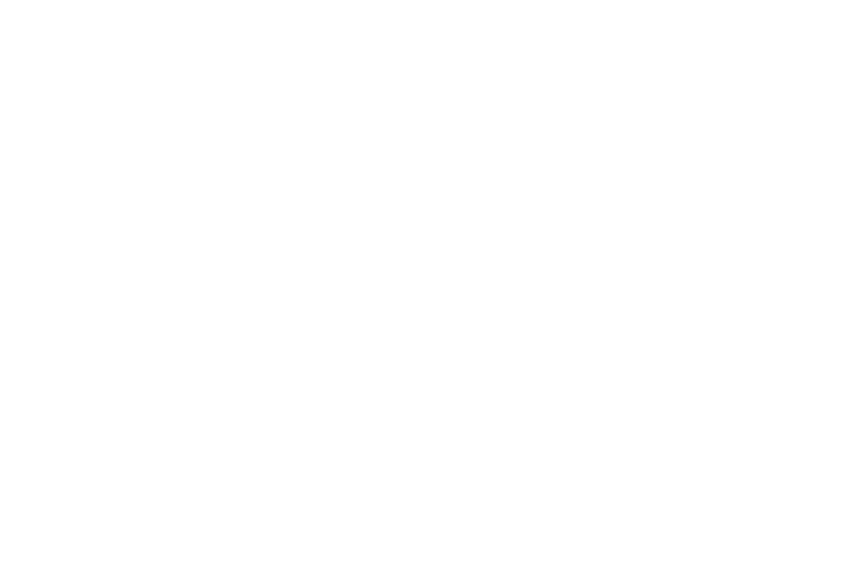

<IPython.core.display.Javascript object>


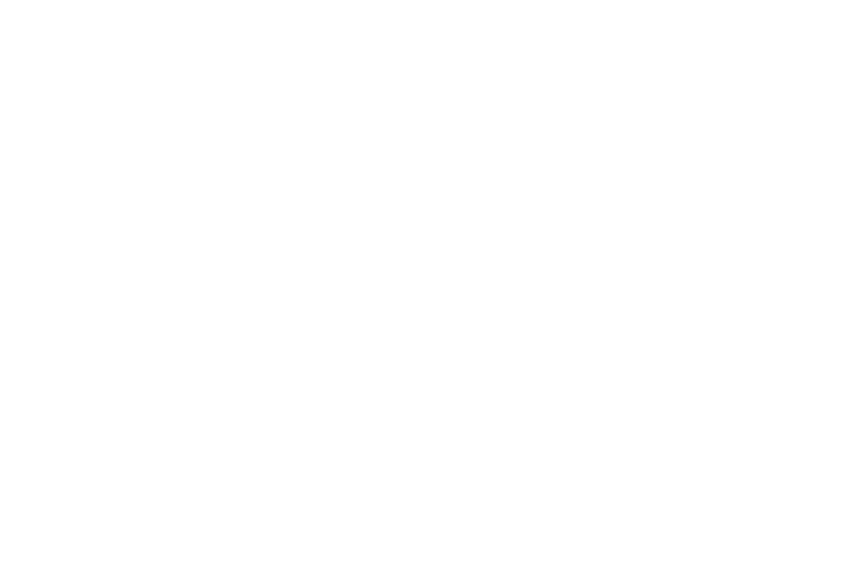

<IPython.core.display.Javascript object>


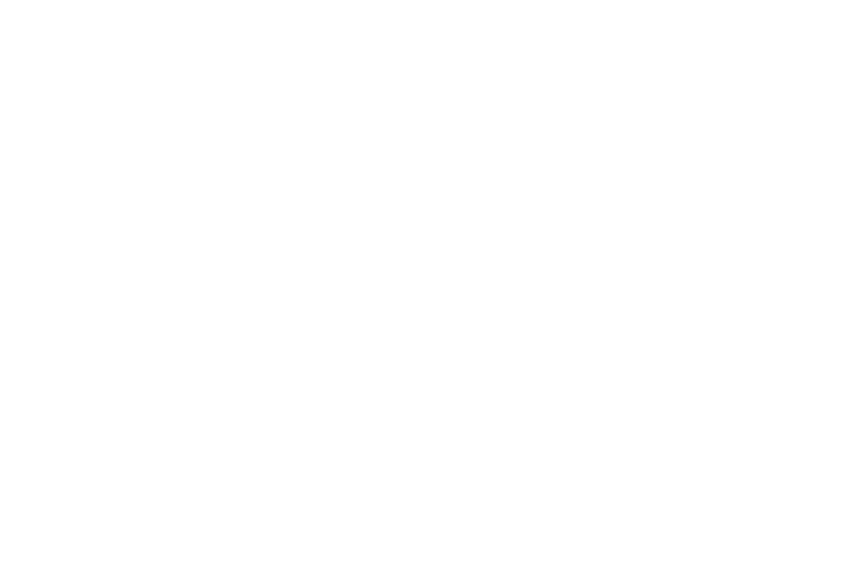

<IPython.core.display.Javascript object>


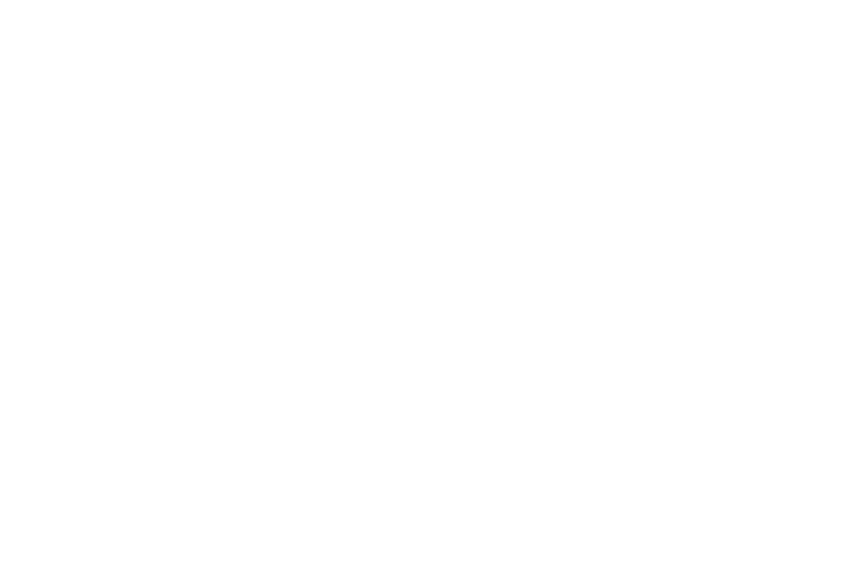

<IPython.core.display.Javascript object>


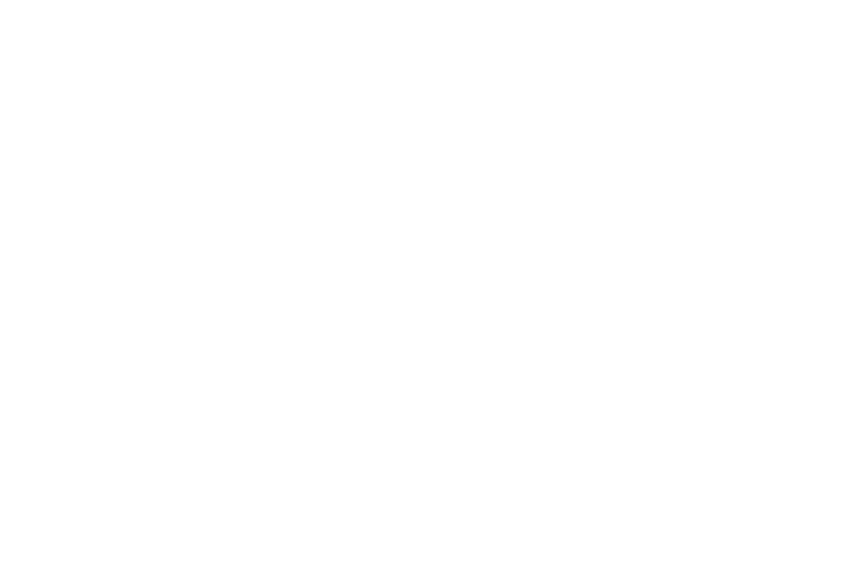

<IPython.core.display.Javascript object>


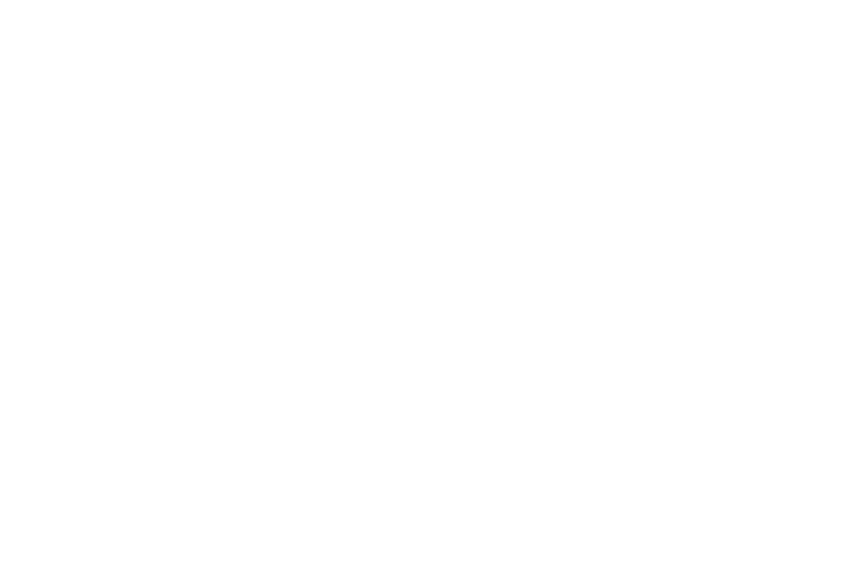

<IPython.core.display.Javascript object>


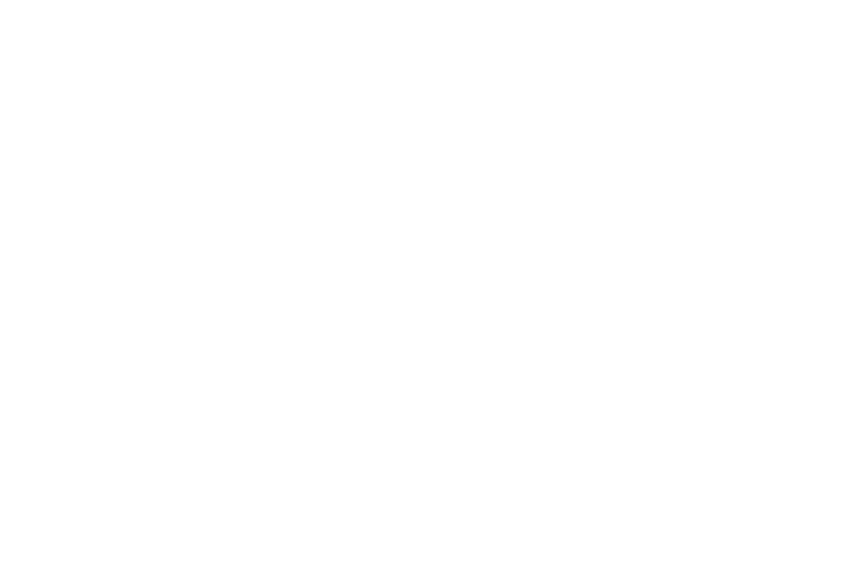

<IPython.core.display.Javascript object>


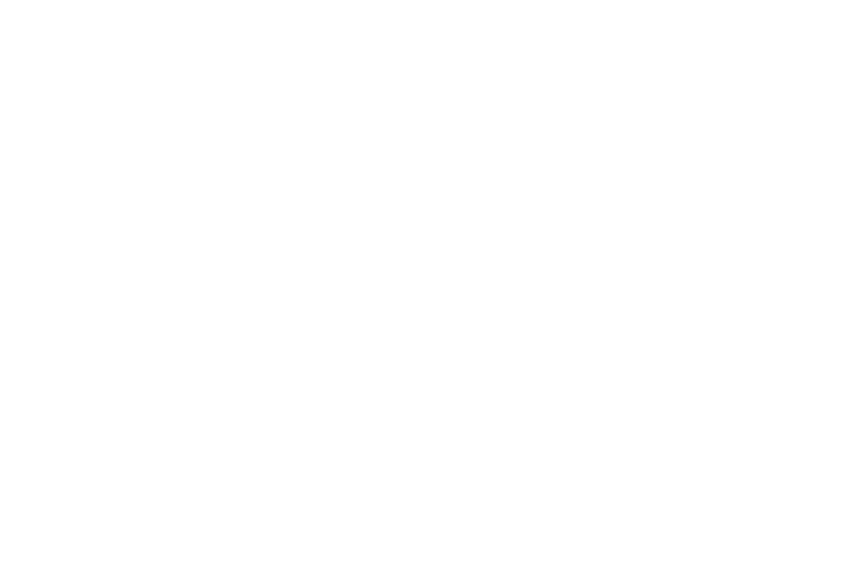

<IPython.core.display.Javascript object>


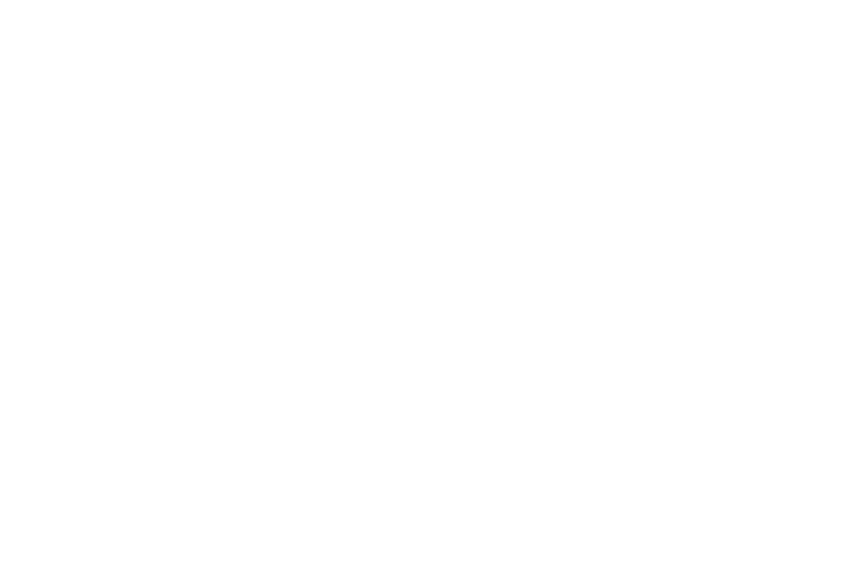

<IPython.core.display.Javascript object>


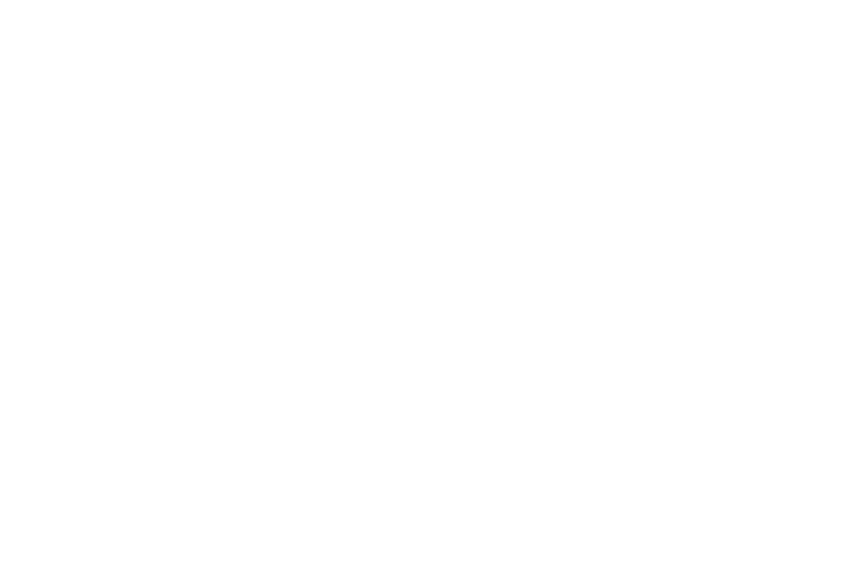

<IPython.core.display.Javascript object>


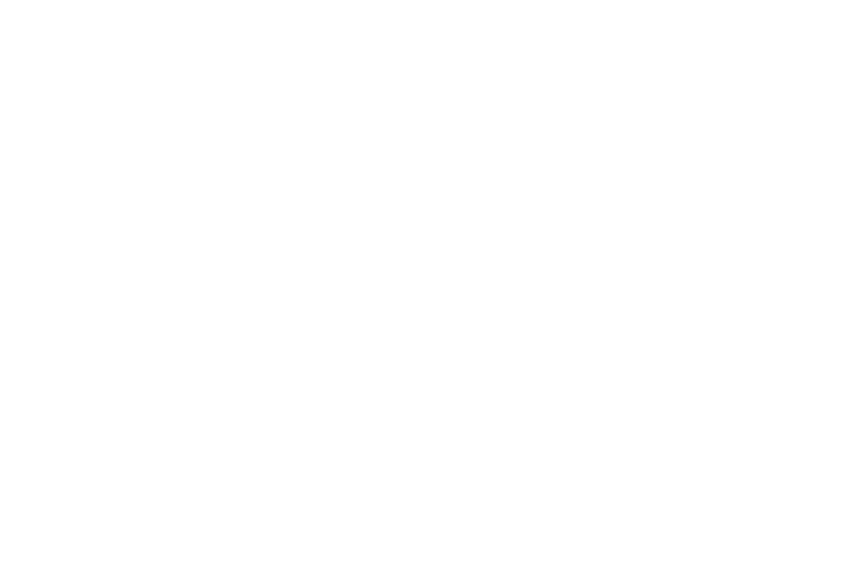

<IPython.core.display.Javascript object>


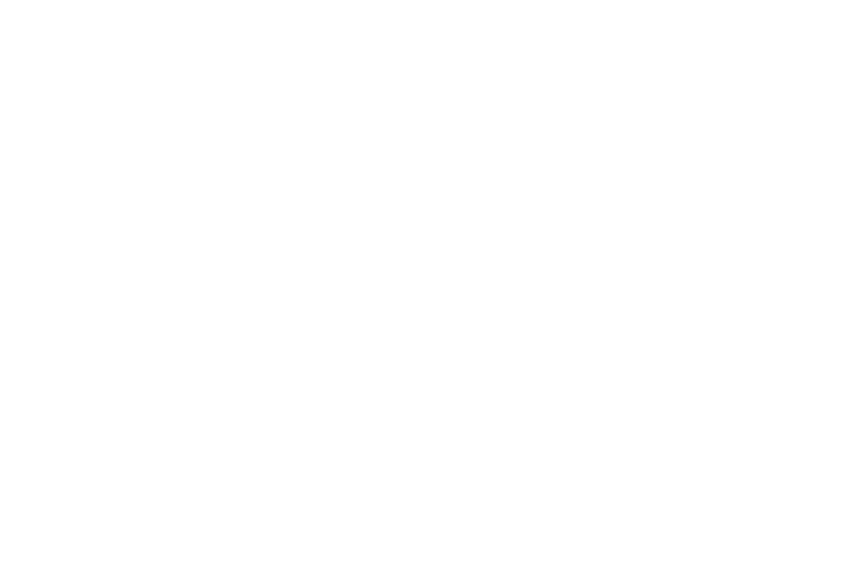

<IPython.core.display.Javascript object>


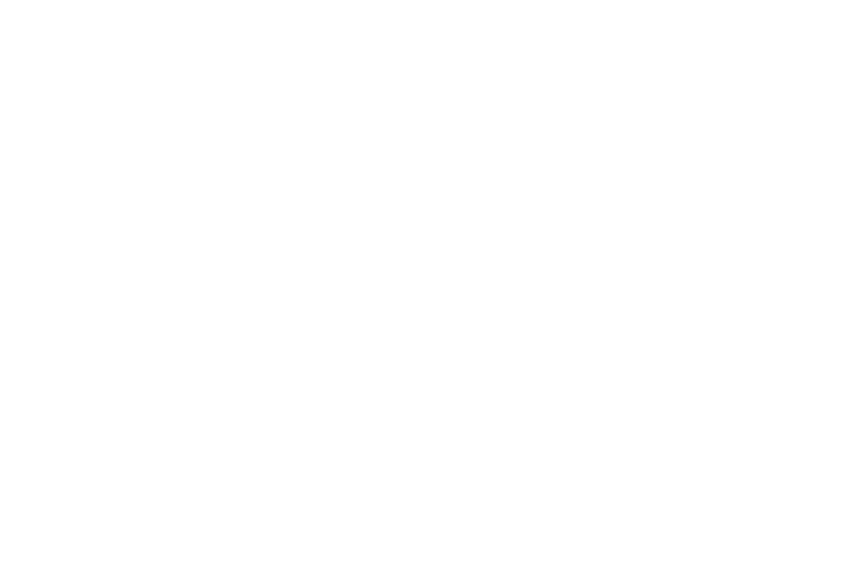

<IPython.core.display.Javascript object>


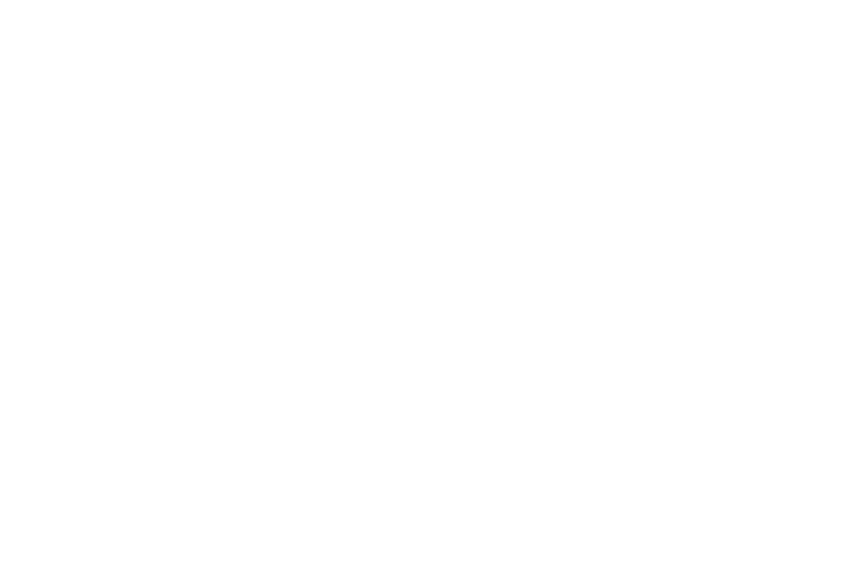

<IPython.core.display.Javascript object>


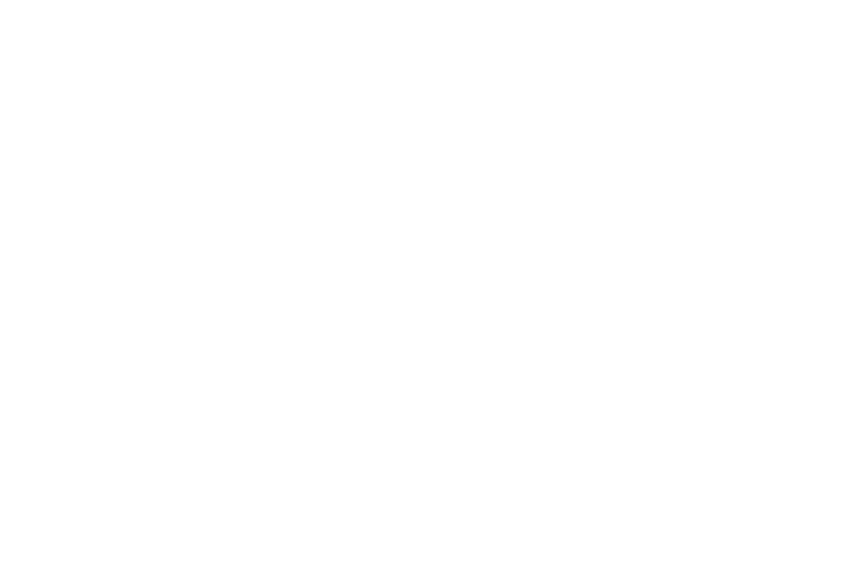

<IPython.core.display.Javascript object>


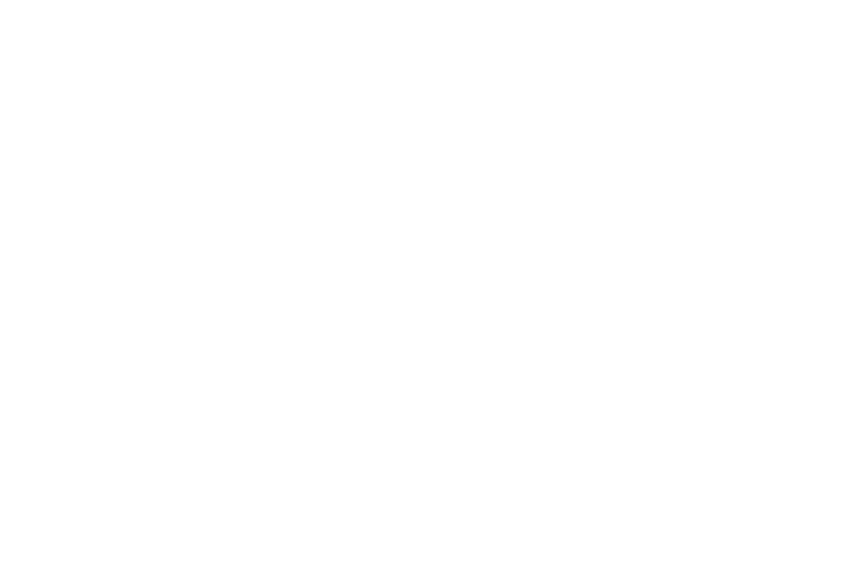

<IPython.core.display.Javascript object>


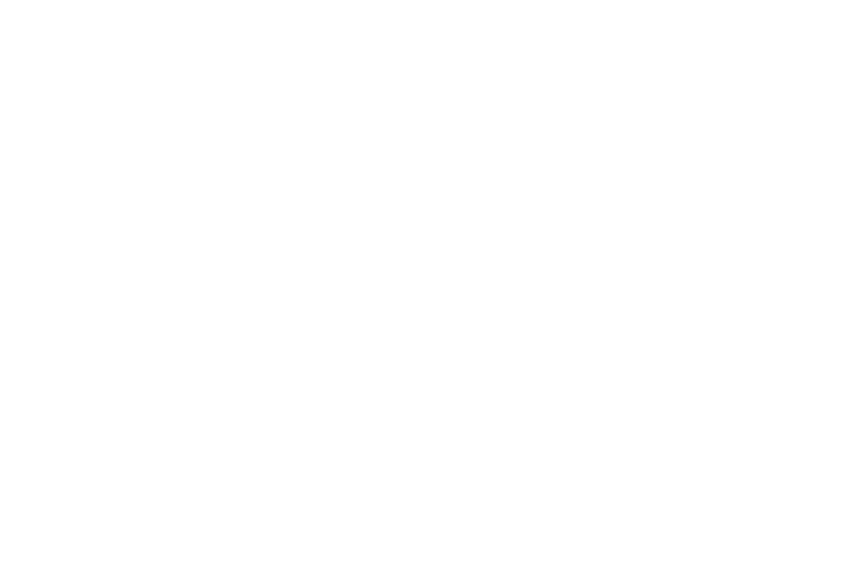

<IPython.core.display.Javascript object>


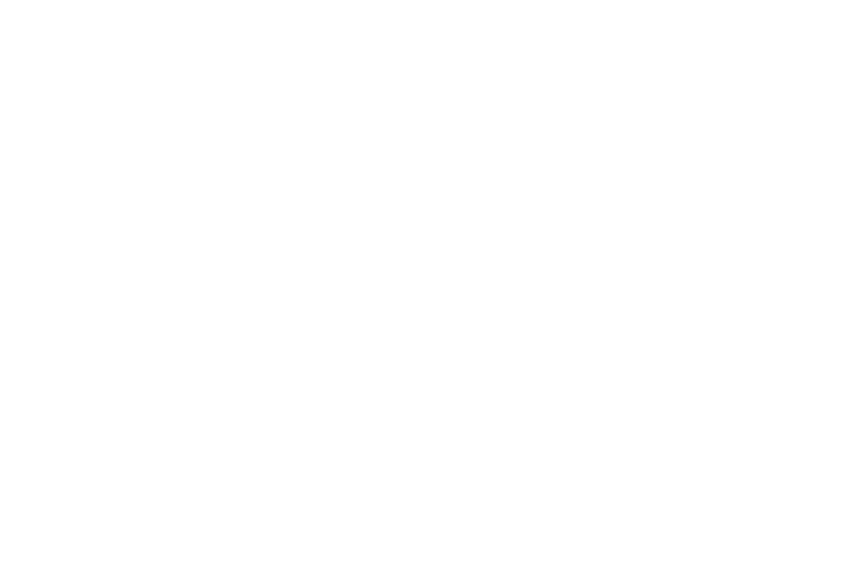

<IPython.core.display.Javascript object>


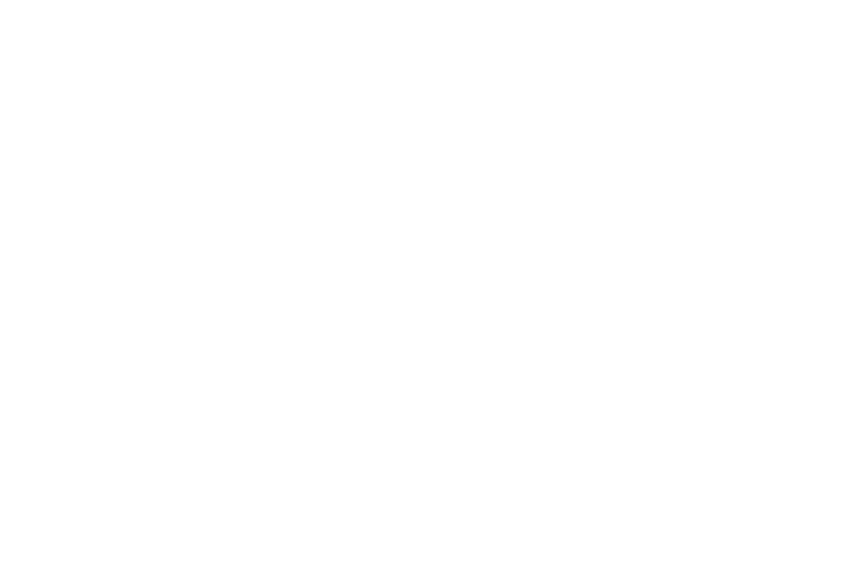

<IPython.core.display.Javascript object>


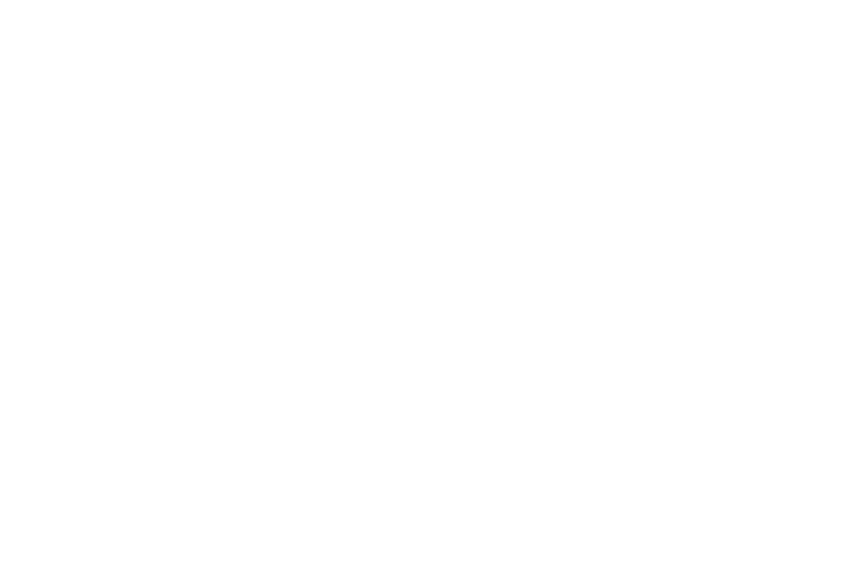

<IPython.core.display.Javascript object>


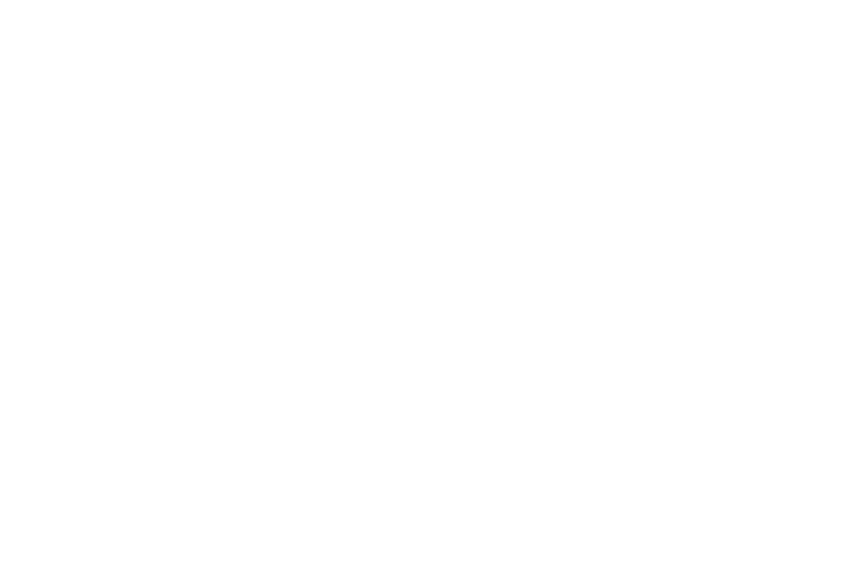

<IPython.core.display.Javascript object>


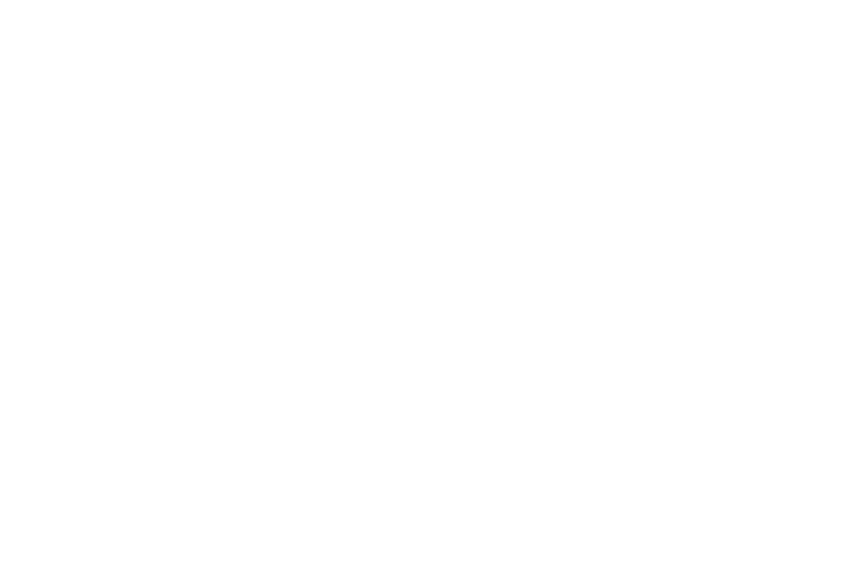

<IPython.core.display.Javascript object>


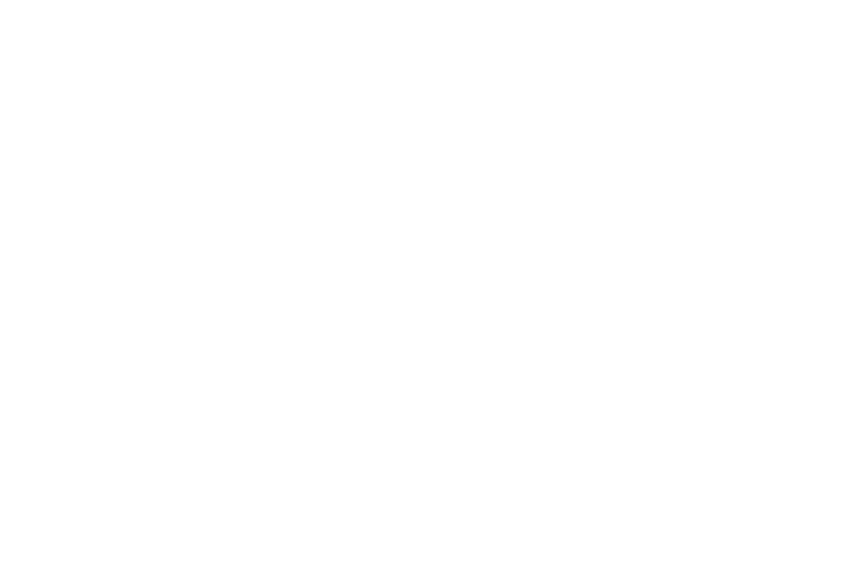

<IPython.core.display.Javascript object>


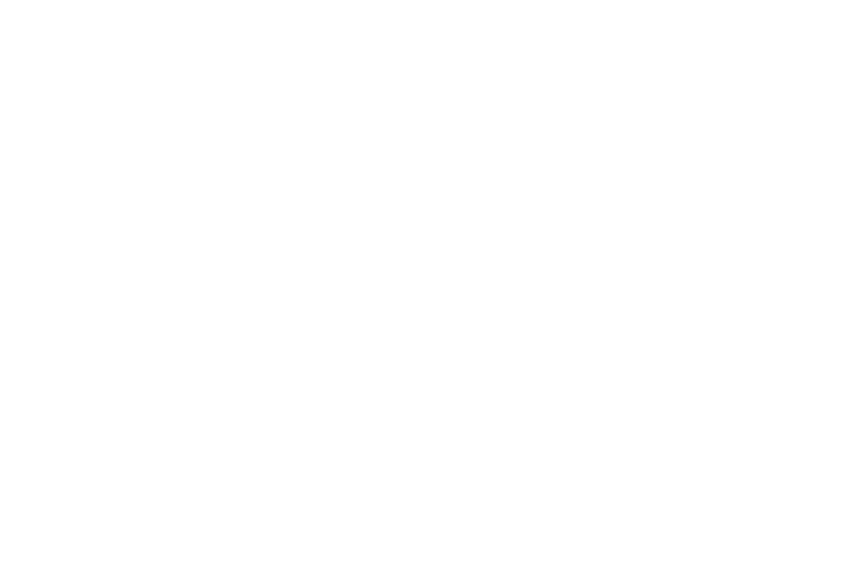

<IPython.core.display.Javascript object>


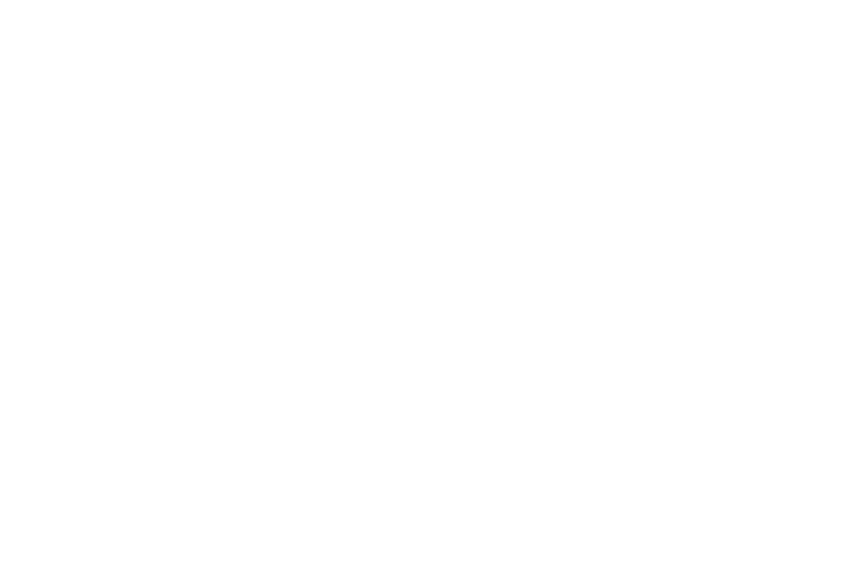

<IPython.core.display.Javascript object>


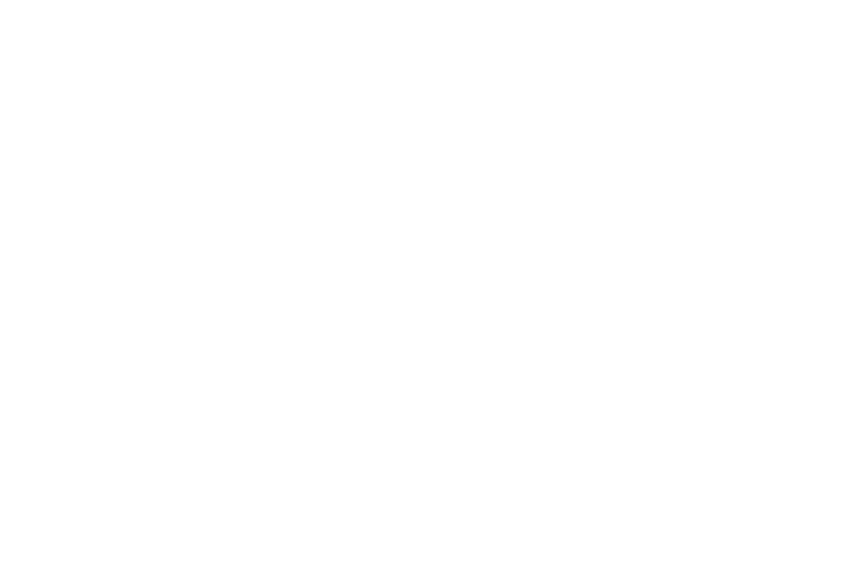

<IPython.core.display.Javascript object>


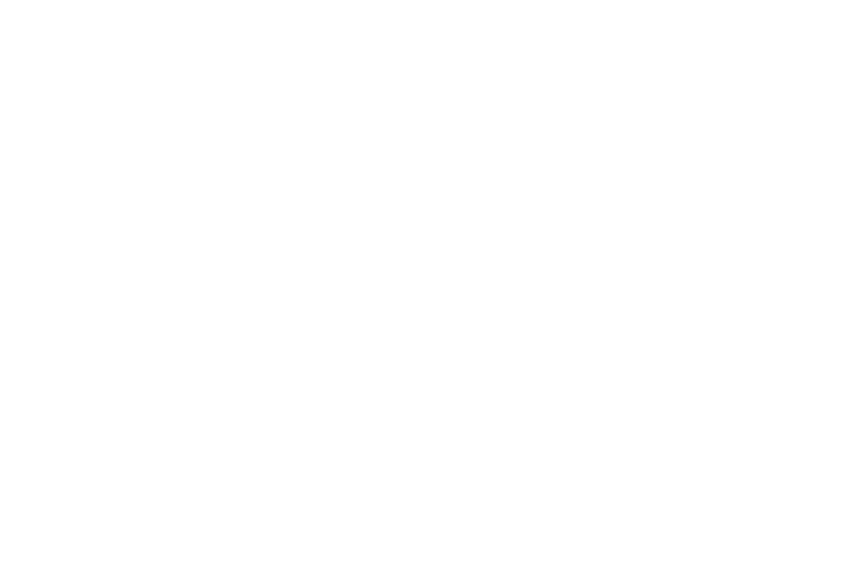

<IPython.core.display.Javascript object>


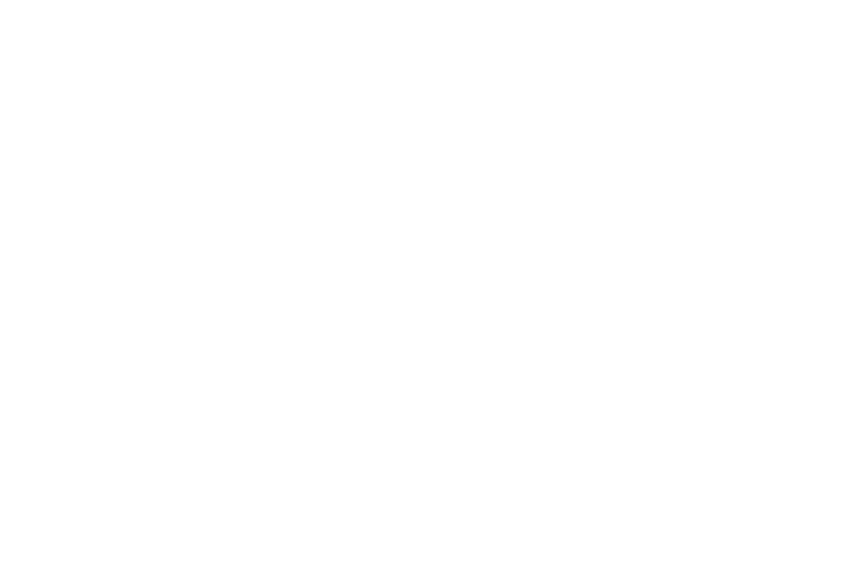

<IPython.core.display.Javascript object>


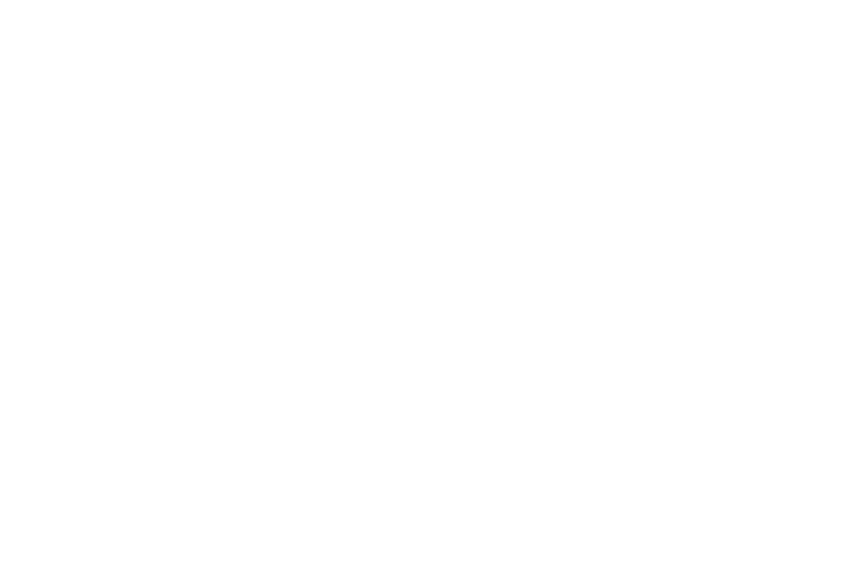

<IPython.core.display.Javascript object>


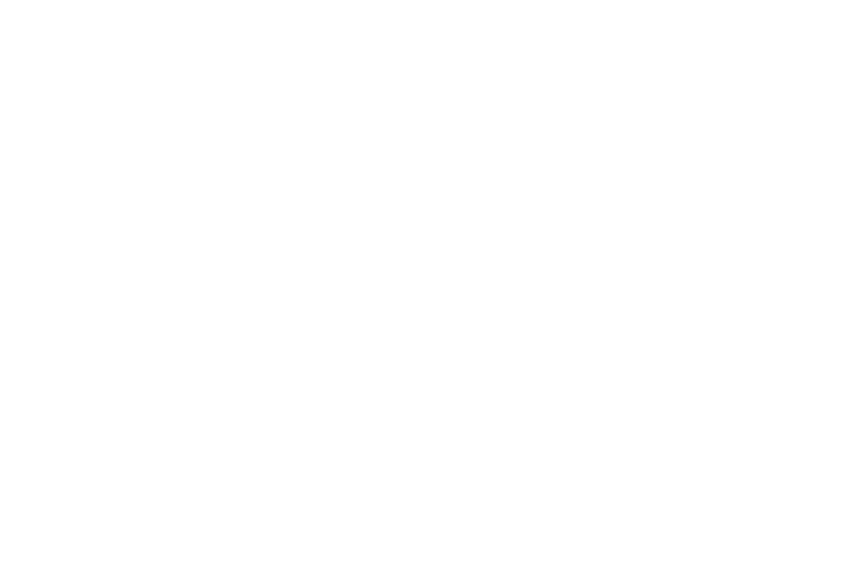

<IPython.core.display.Javascript object>


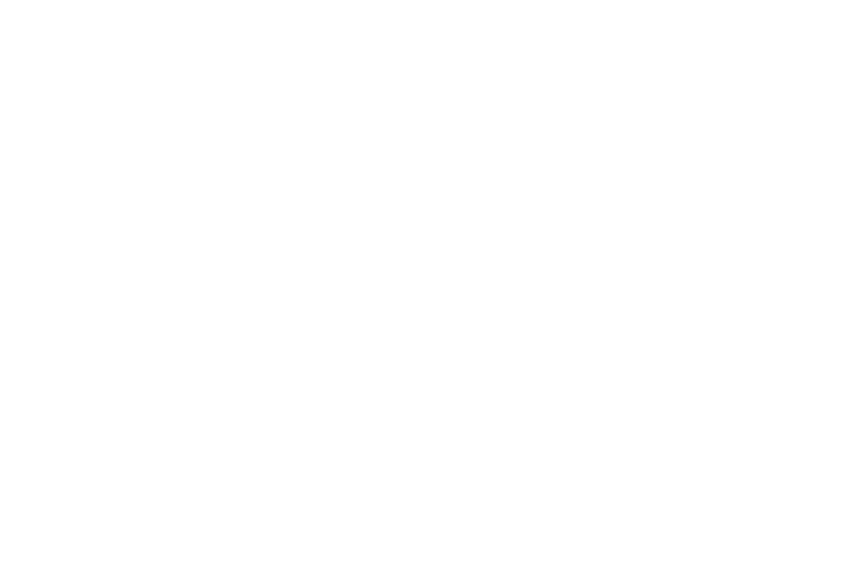

<IPython.core.display.Javascript object>


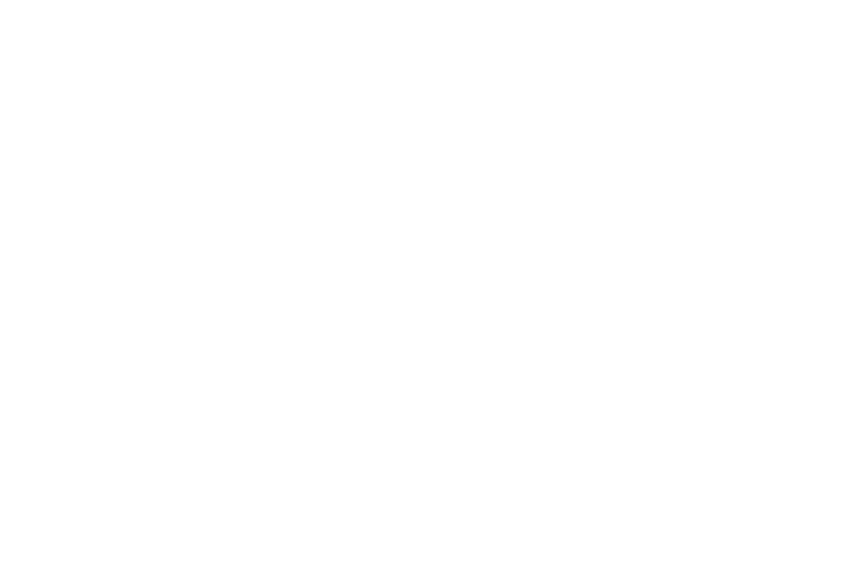

<IPython.core.display.Javascript object>


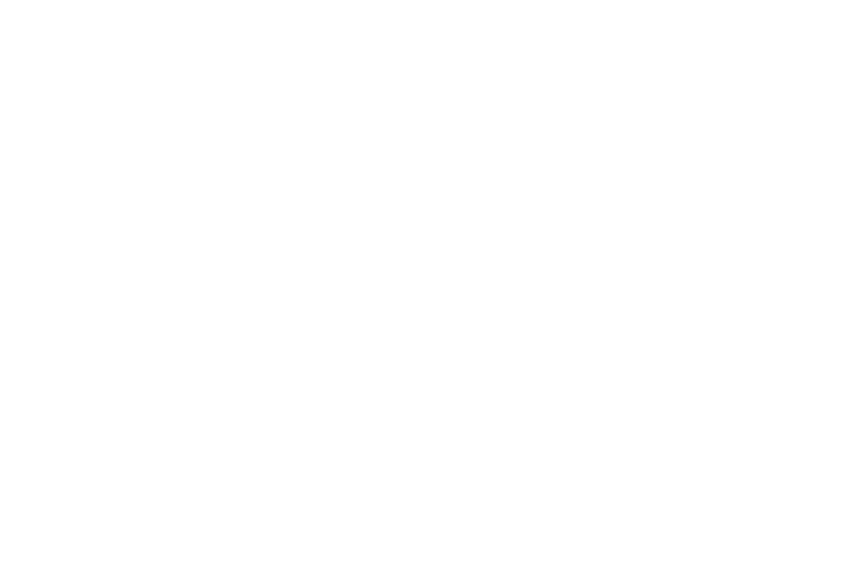

<IPython.core.display.Javascript object>


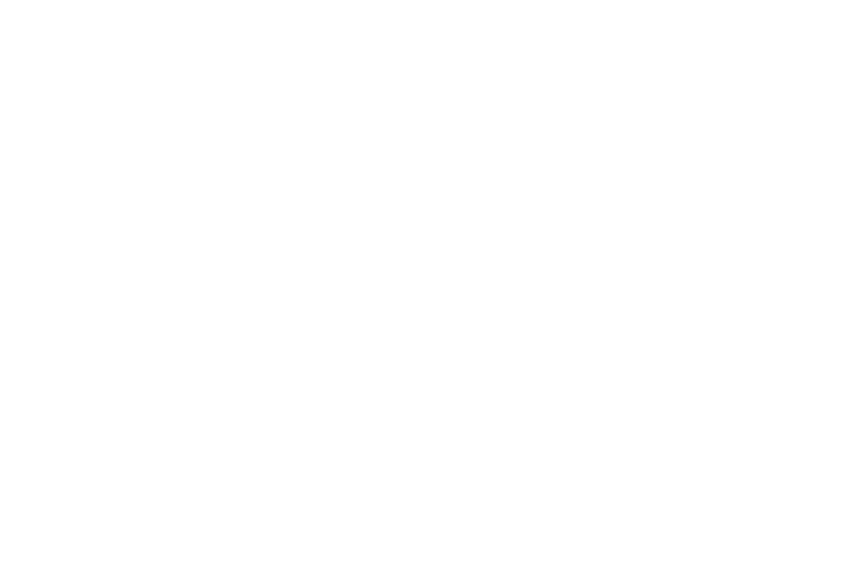

<IPython.core.display.Javascript object>


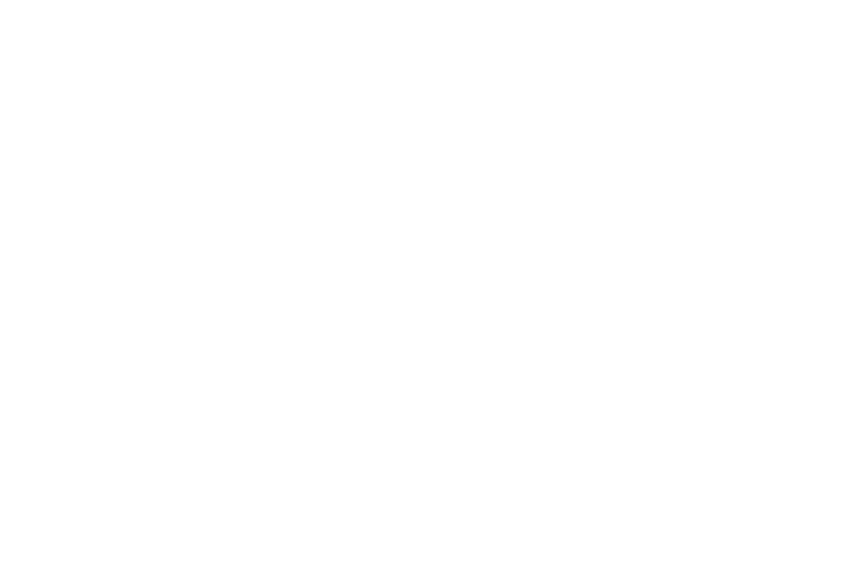

<IPython.core.display.Javascript object>


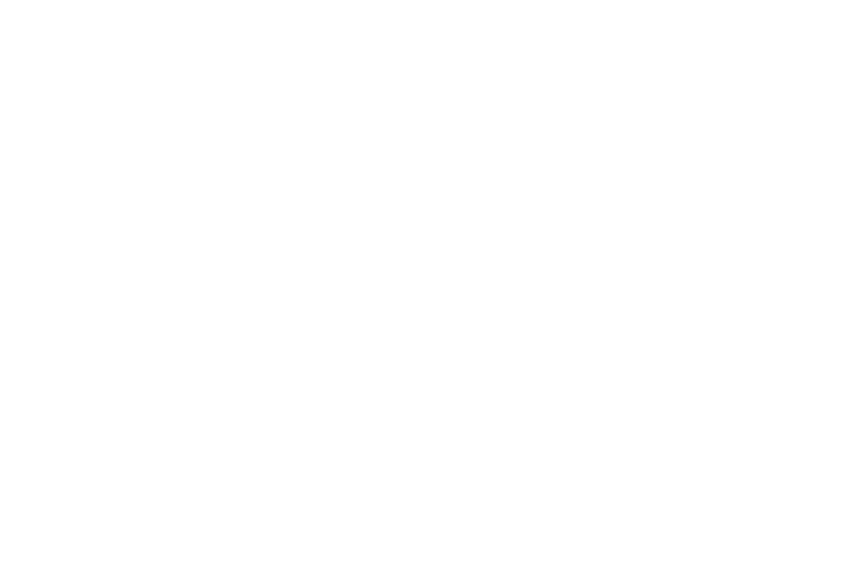

<IPython.core.display.Javascript object>


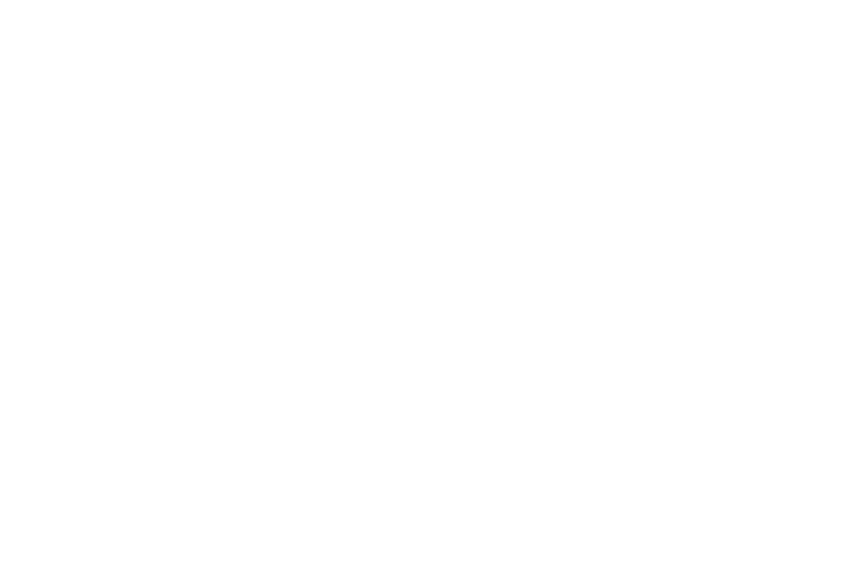

<IPython.core.display.Javascript object>


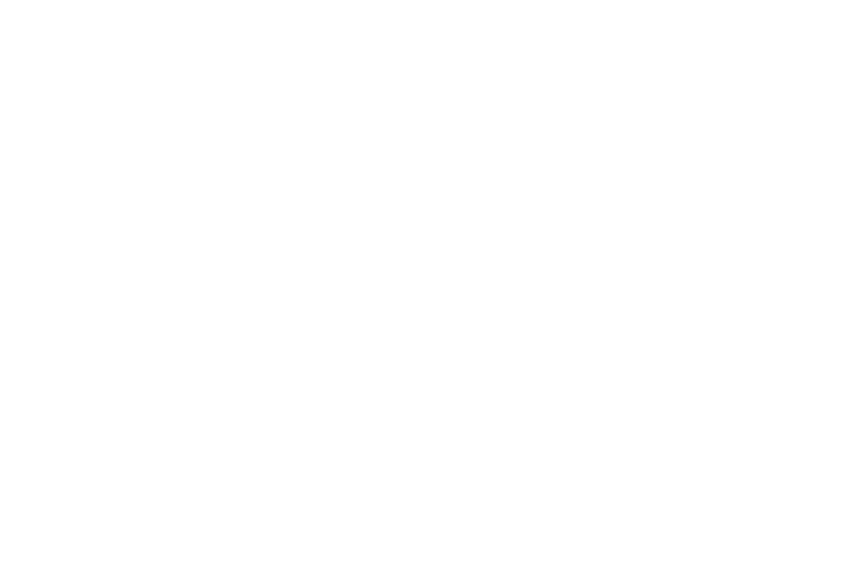

<IPython.core.display.Javascript object>


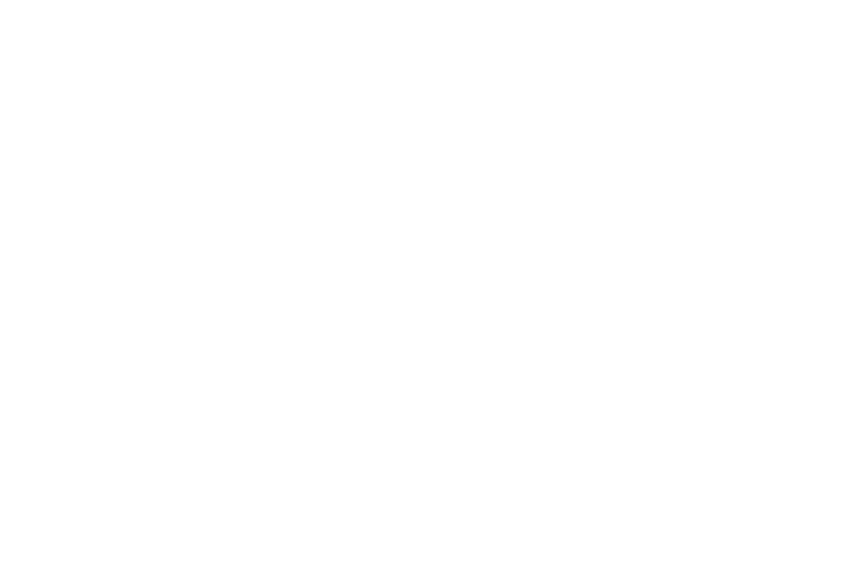

<IPython.core.display.Javascript object>


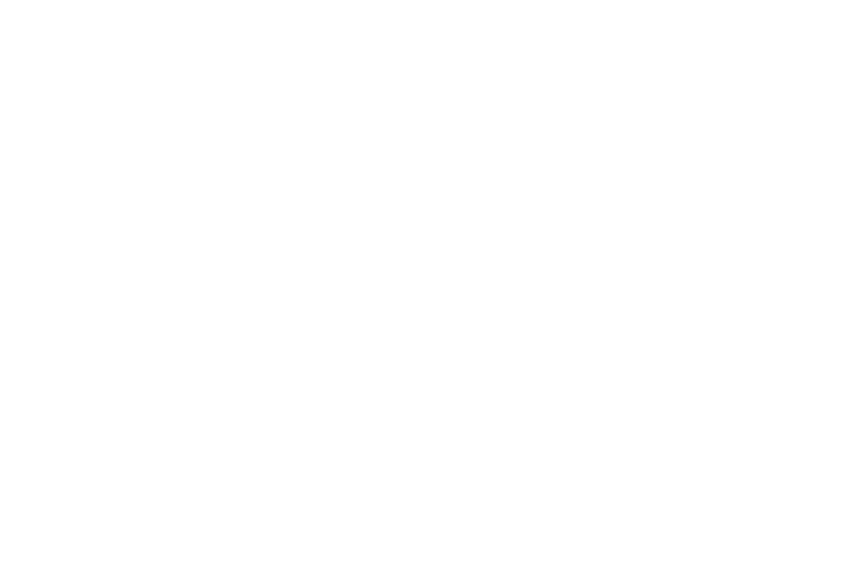

<IPython.core.display.Javascript object>


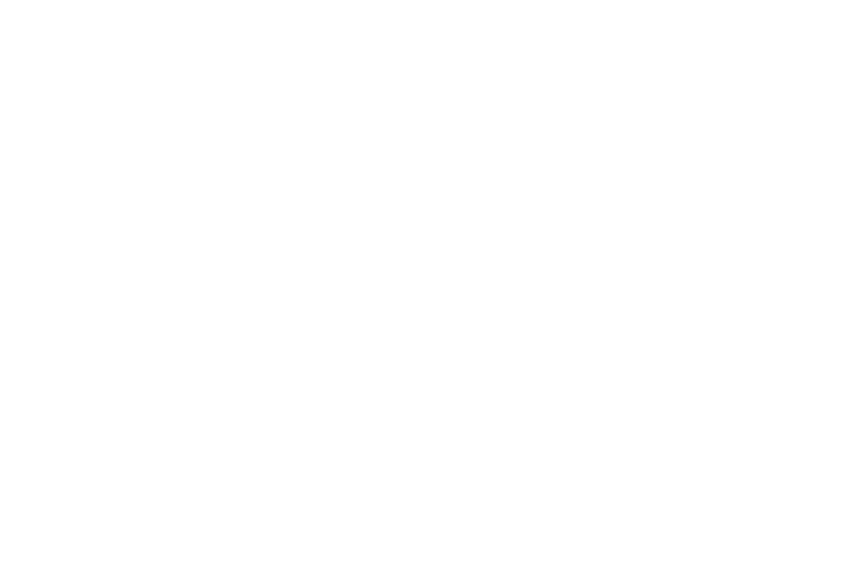

<IPython.core.display.Javascript object>


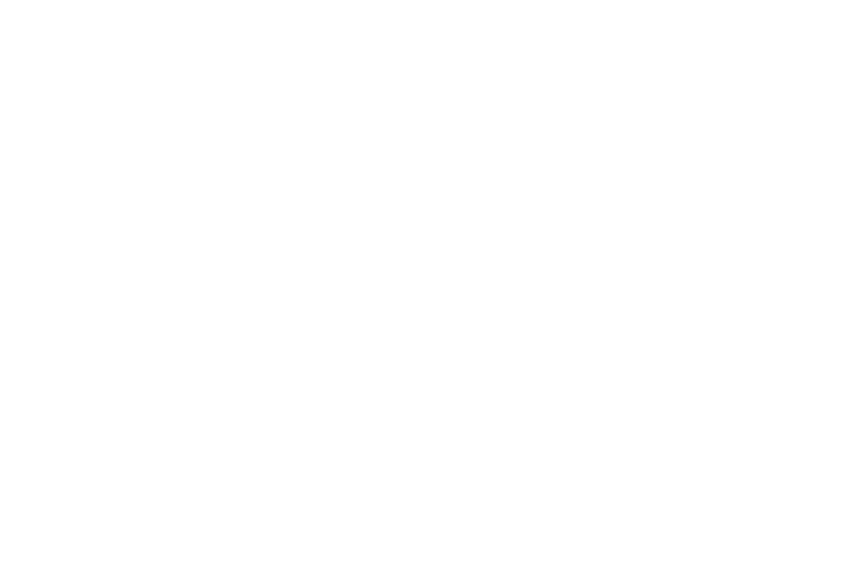

<IPython.core.display.Javascript object>


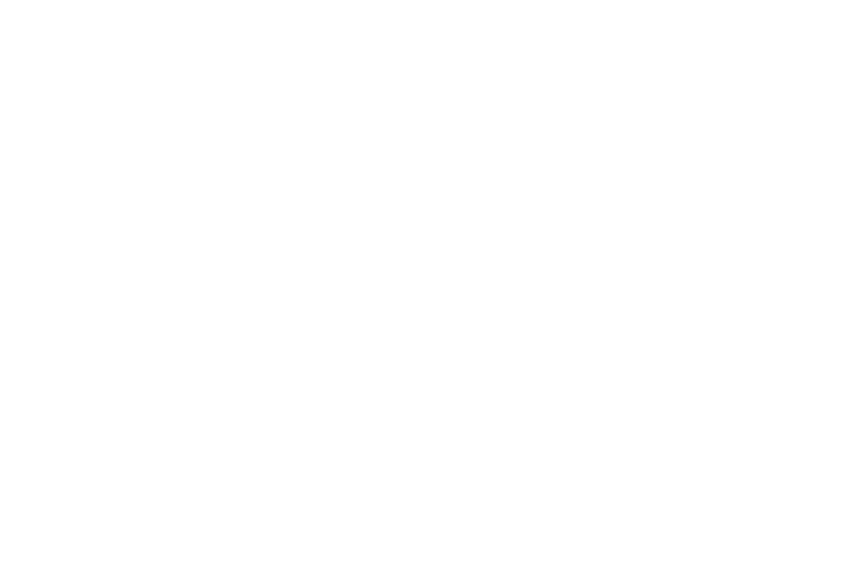

<IPython.core.display.Javascript object>


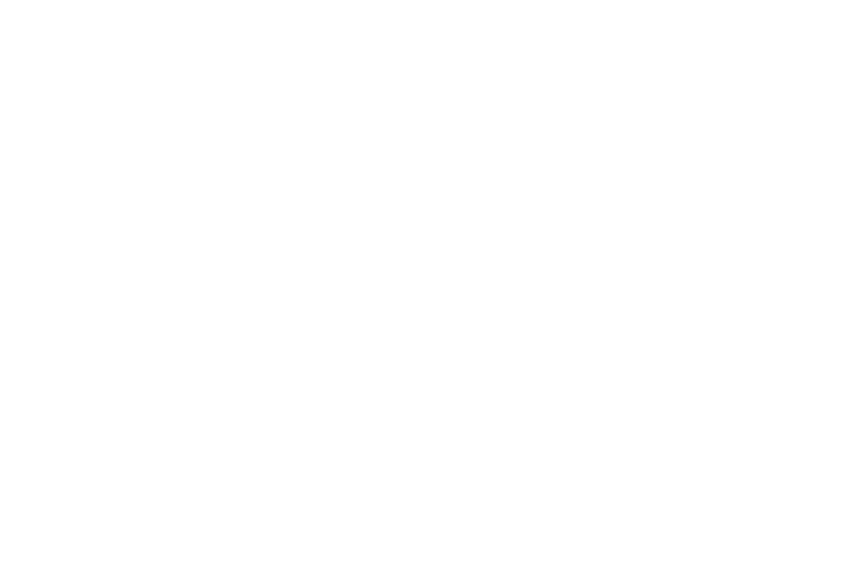

<IPython.core.display.Javascript object>


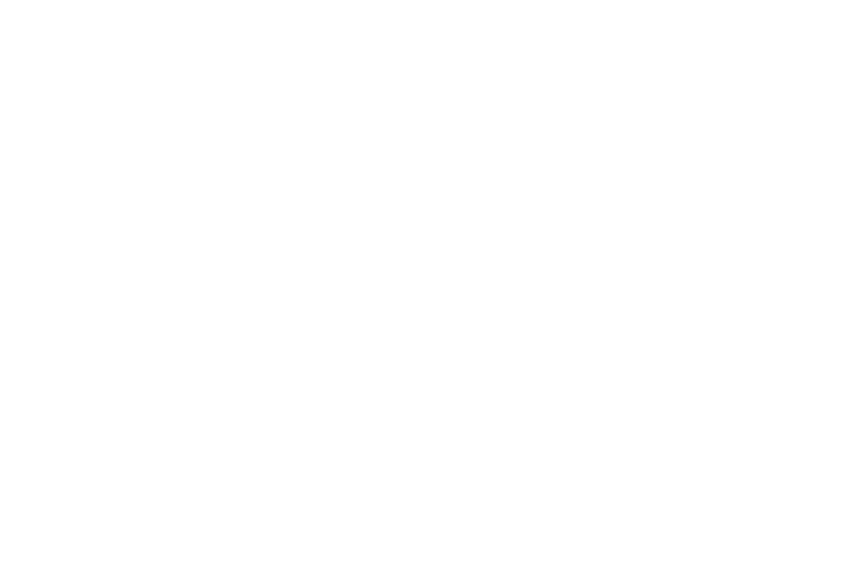

<IPython.core.display.Javascript object>


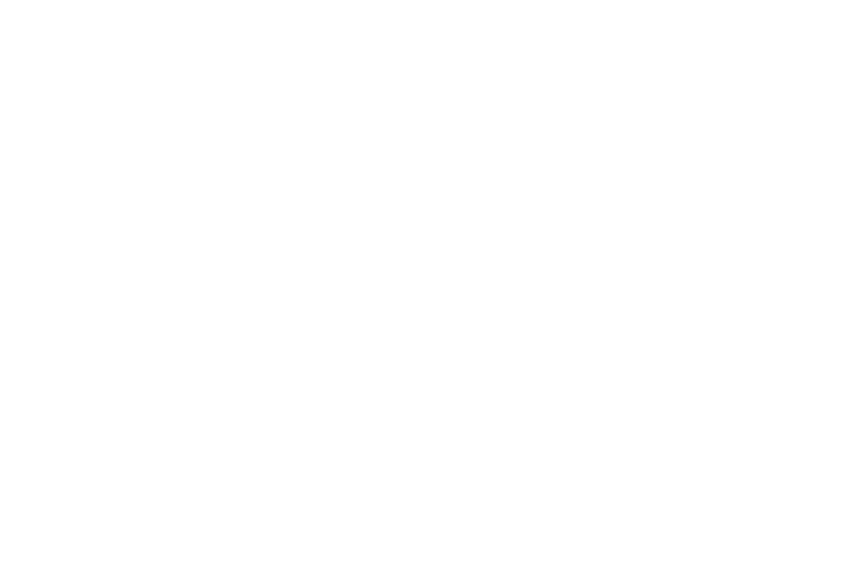

<IPython.core.display.Javascript object>


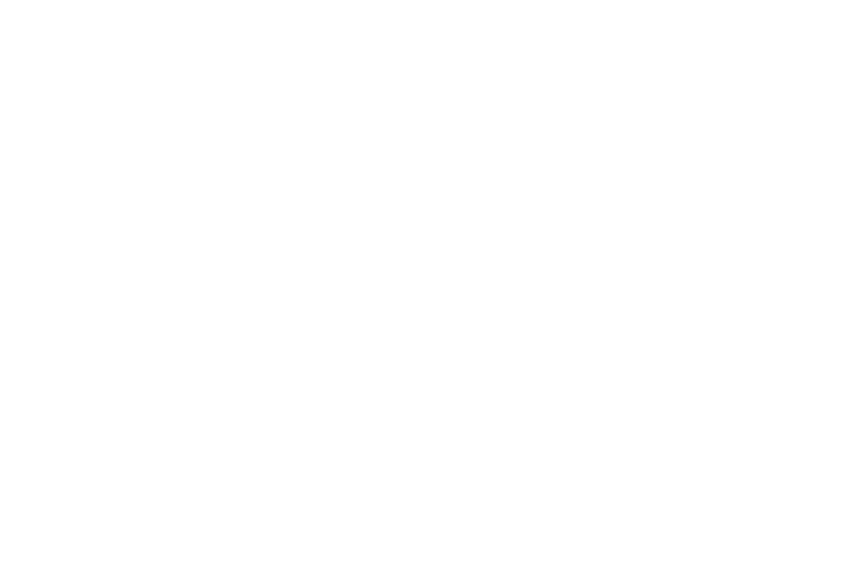

<IPython.core.display.Javascript object>


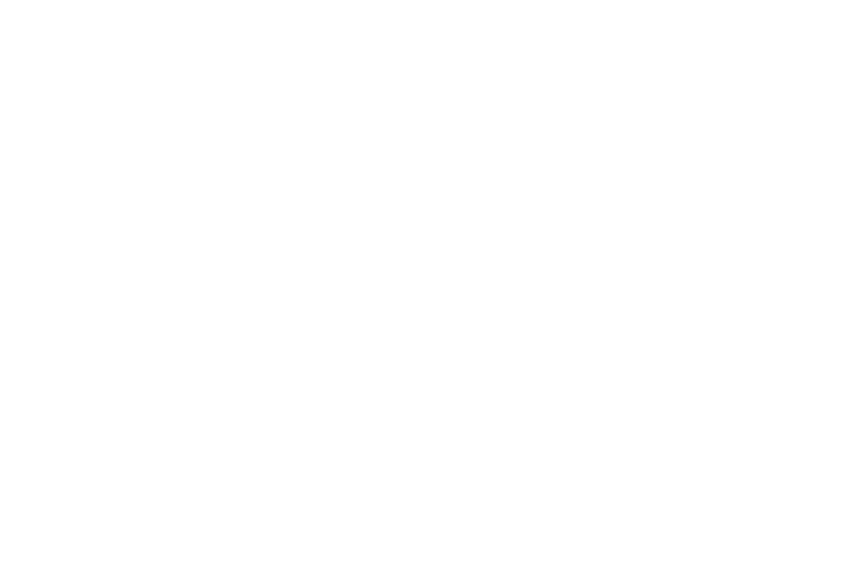

<IPython.core.display.Javascript object>


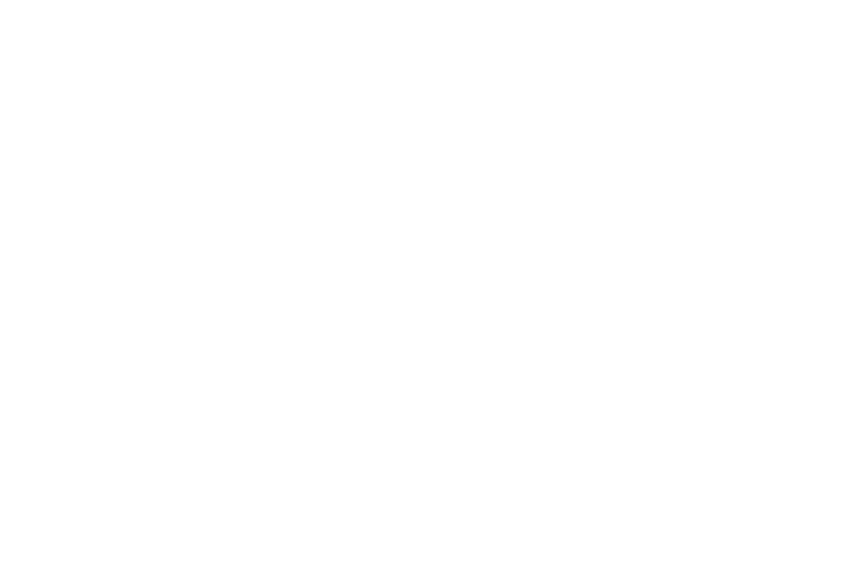

<IPython.core.display.Javascript object>


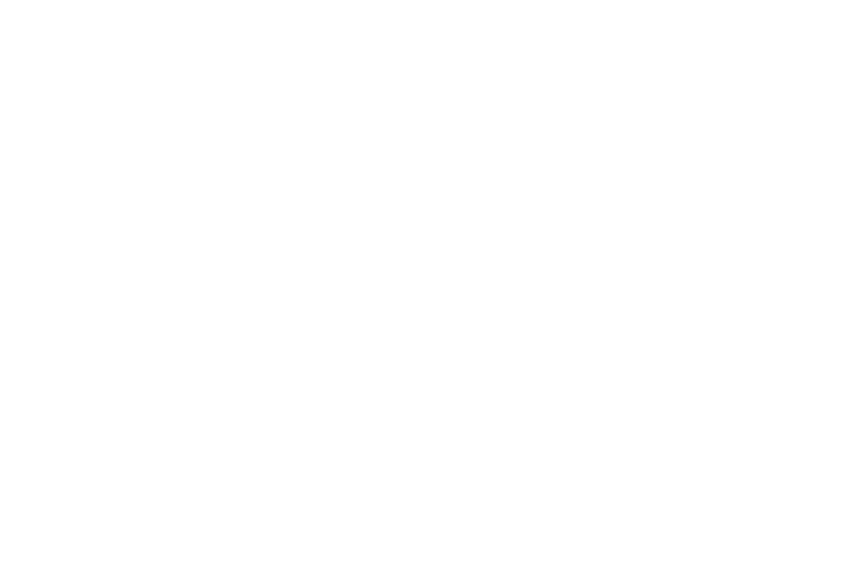

<IPython.core.display.Javascript object>


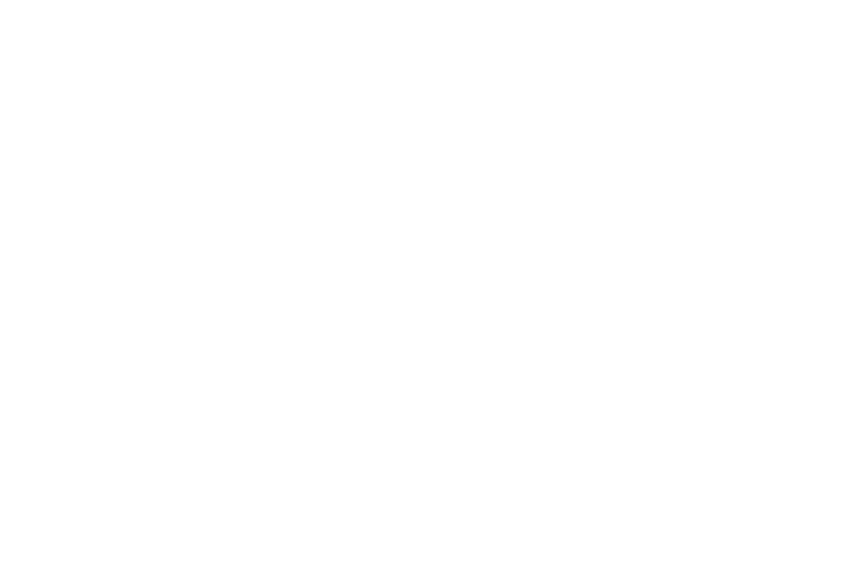

<IPython.core.display.Javascript object>


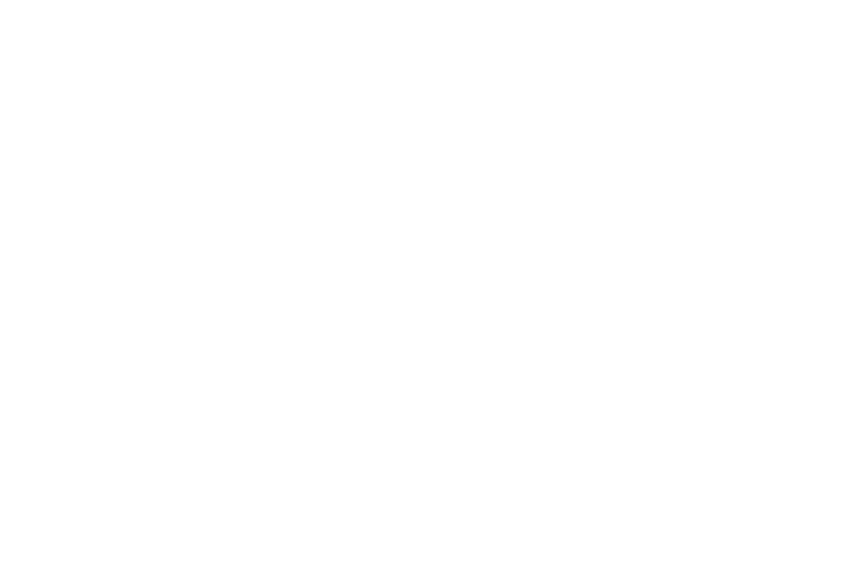

<IPython.core.display.Javascript object>


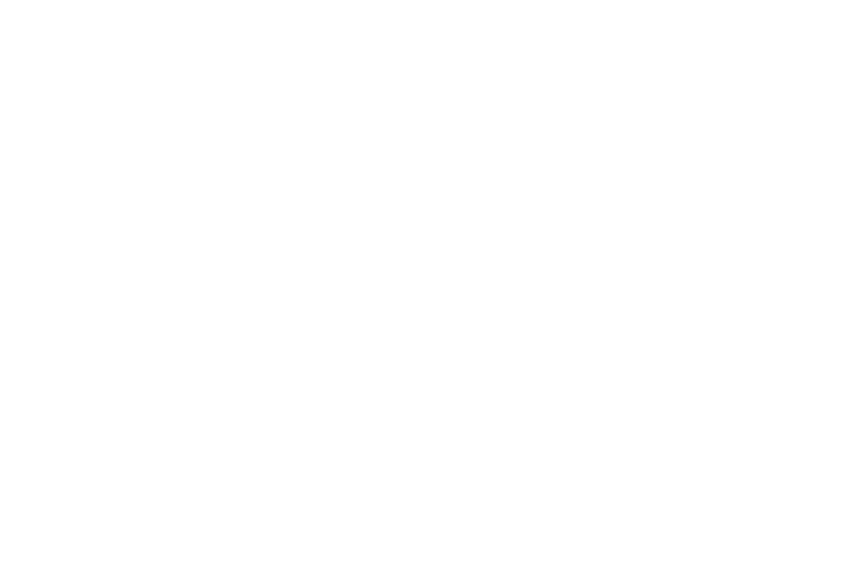

<IPython.core.display.Javascript object>


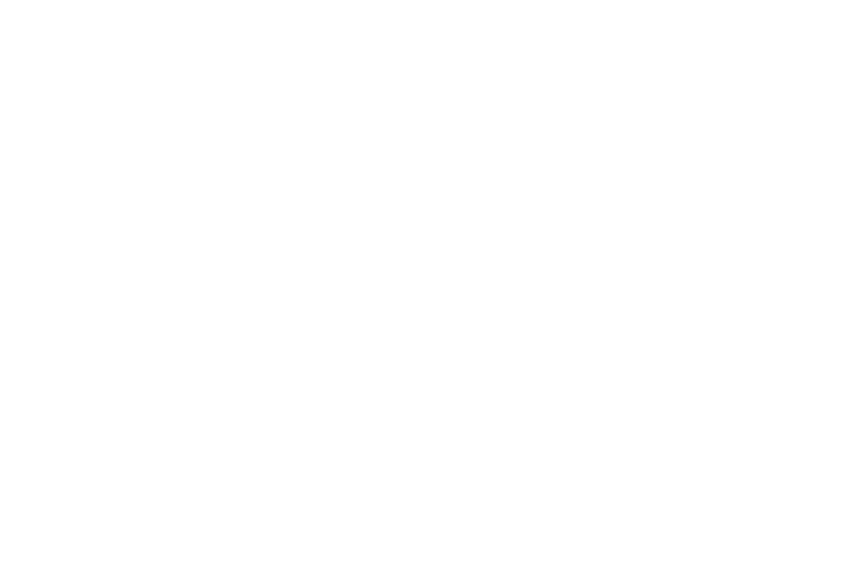

<IPython.core.display.Javascript object>


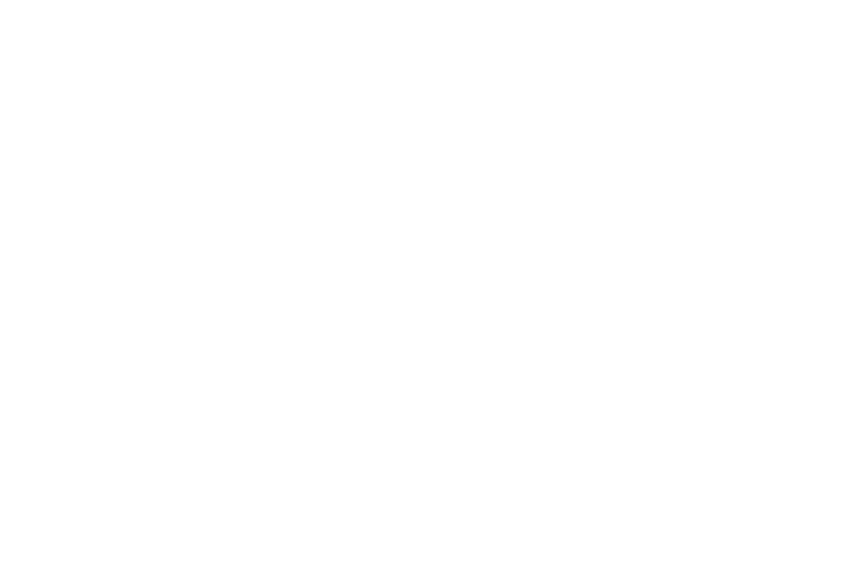

<IPython.core.display.Javascript object>


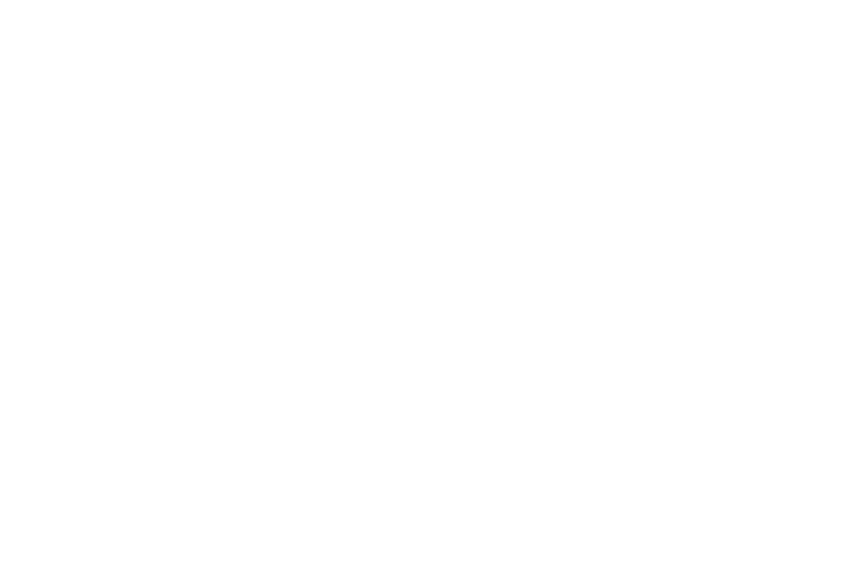

<IPython.core.display.Javascript object>


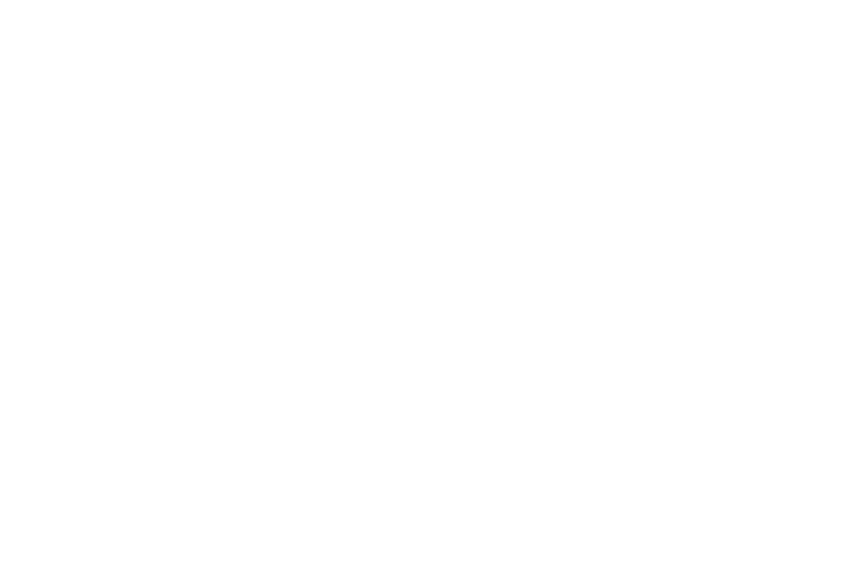

<IPython.core.display.Javascript object>


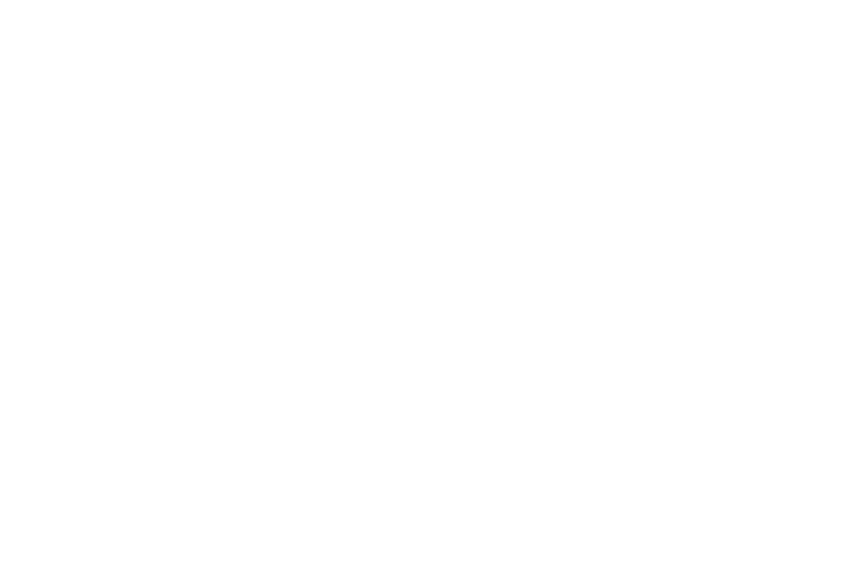

<IPython.core.display.Javascript object>


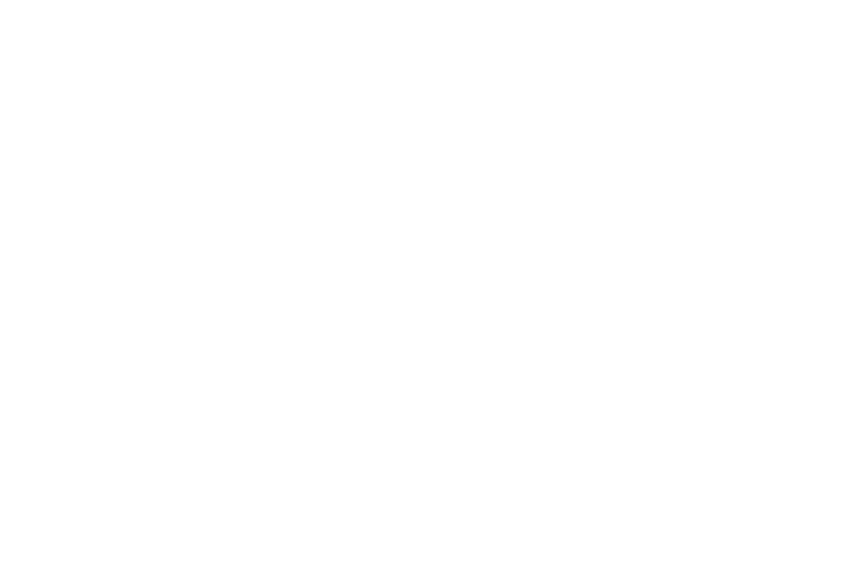

<IPython.core.display.Javascript object>


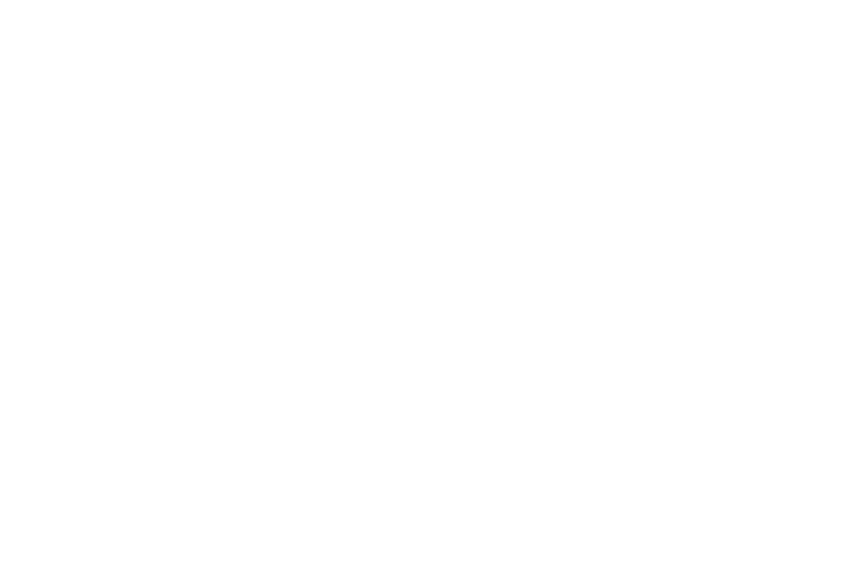

In [40]:
%matplotlib notebook

x = np.linspace(0, 2 * np.pi)

def update(w = 1.0):
    plt.plot(np.sin(w * x))

interact(update);